# Continuous Glucose Monitoring for Artificial Intelligence and Learning

**Student: Shreeya Sharma, Parth Chavan, Kinghsuk Sarmah, Jonel Mathew, Shradha Misal**

The dataset used for the proyect was obtained from https://www.jaeb.org/projects/, which consists of a study designed to test CGM as a technology to assist in diabetes care. The randomized trial was intended to determine if CGM usage had a positive effect on diabetes management.

# 0. Dataset description 

**Explanation of the dataset**

In this data set the goal is 
 
* RecID: Unique record ID in table
* Visit: Visit
* PtID: Patient ID
* HxSmoke: Does the patient smoke cigarettes
* Angiotensin: Does the patient take an angiotensin or angiotensin II 
* Aspirin: Does the patient take a daily aspirin
* LaserTx: Has the patient ever had laser treatment for diabetic eye disease 
* Neuropathy: Has the patient ever had symptoms of diabetic neuropathy 
* BldPrSys: Has the patient ever had symptoms of Systolic blood pressure reading
* BIdPrDia: Diastolic blood pressure reading
* BldPrNA: Blood pressure reading not available
* TotalChol: Most recent total cholesterol level
* TotalCholNA: Total cholesterol level not available
* HDLChol: Most recent HDL cholesterol level
* HDLChoINA: HDL cholesterol level not available
* LDLChol: Most recent LDL cholesterol level
* LDLChoINA: LDL cholesterol level not available
* QuestNotDone: Questionnaire not completed
---
* DeviceDtTm: Device Date time 
* Glucose: Sensor Glucose 
---
* Event: Type of event (hypoglycemia or hyperglycemia) 
* OnsetDt: Date of Onset 
---
* LabHbA1cDt: Date of Sample Collection 
* LabA1cResult: A1c result from Central Lab for sample marked
---
* Gender: Gender
* AgeAsOfRandDt: Subject’s age as of randomization date 
* Race: Race
* Ethnicity: Ethnicity
* Height: Height cm 
* Weight: Weight kg 
* DurDiabetes: Duration of diabetes in years as of randomization date 
---
* InsulinModality: Insulin Route (pump or injections) at time of randomization 
* NumSevHypo: Number of hypoglycemic seizures/loss of consciousness in last 6 months 
* HGMReadAvg: As assessed by clinic personnel, what is the average number of fingerstick readings the subject has done each day over the last 7 days 
* EduCareGvrP: Primary Caregiver 
* EduCareGvrPEdu: Highest level of education completed by Primary Caregiver 
* RandDt: Date of randomization 
* TxGroup: Treatment group 


# 1. Installing the required libraries 


Some aditional libraries have been installed in order to have aditional capabilities : 
* tsfresh is a python package. It automatically calculates a large number of time series characteristics

In [1]:
# !pip install tsfresh

In [2]:
# !pip install sklearn_evaluation

# 2. Import data 

The data is directly extracted from the cgm-tamborlane-2008 dataset. Furthermore , some precalculated files which take long computation time have been included.

In [3]:
import pandas as pd
import os
import glob
path= 'DataTables'
# Use glob to get all the csv files in the folder
csv_files = glob.glob(os.path.join(path, "tblA*.csv"))
number = 0

In [4]:
# Indicate the files, columns, type of variables (numerical, categorical, etc.).
for element in csv_files:
  data = pd.read_csv(element) # We can change this database
  number += 1
  print(number,'File Name:', element.split("/")[-1],'\n')  
  columns = data.columns
  print('Columns:' ,columns, '\n')
  datatype = data.dtypes
  print('Type:','\n' ,datatype, '\n')

1 File Name: DataTables\tblAAddlCEData.csv 

Columns: Index(['RecID', 'Visit', 'PtID', 'HxSmoke', 'Angiotensin', 'Aspirin',
       'LaserTx', 'Neuropathy', 'BldPrSys', 'BldPrDia', 'BldPrNA', 'TotalChol',
       'TotalCholNA', 'HDLChol', 'HDLCholNA', 'LDLChol', 'LDLCholNA',
       'QuestNotDone'],
      dtype='object') 

Type: 
 RecID             int64
Visit            object
PtID              int64
HxSmoke          object
Angiotensin      object
Aspirin          object
LaserTx          object
Neuropathy       object
BldPrSys        float64
BldPrDia        float64
BldPrNA         float64
TotalChol       float64
TotalCholNA     float64
HDLChol         float64
HDLCholNA       float64
LDLChol         float64
LDLCholNA       float64
QuestNotDone    float64
dtype: object 

2 File Name: DataTables\tblADataRTCGM_Blind_Baseline.csv 

Columns: Index(['RecID', 'PtID', 'DeviceDtTm', 'Glucose'], dtype='object') 

Type: 
 RecID          int64
PtID           int64
DeviceDtTm    object
Glucose        

# 3. Exploratory data analysis

* Merge all the files and remove the one related to the continuous monitoring that will be handled in other section


In [5]:
import pandas as pd

csv_files = glob.glob(os.path.join(path, "tblA*.csv"))
csv_monitoring = glob.glob(os.path.join(path, "tblADataRTCGM*.csv"))

for element in csv_monitoring:
  csv_files.remove(element)


* We need to check if there are some duplicated values on the rows.


In [6]:
# Check for duplicated Patient ID values

for element in csv_files:
  x = pd.read_csv(element)

  result = not(x['PtID'].is_unique)
  print(element, 'Duplicated:', result)
  

DataTables\tblAAddlCEData.csv Duplicated: False
DataTables\tblALabHbA1c.csv Duplicated: True
DataTables\tblAPtSummary.csv Duplicated: False
DataTables\tblASurveyCareP.csv Duplicated: True
DataTables\tblASurveyCareS.csv Duplicated: True
DataTables\tblASurveyCGSSAT.csv Duplicated: True
DataTables\tblASurveyCompP.csv Duplicated: False
DataTables\tblASurveyCompS.csv Duplicated: False
DataTables\tblASurveyExpP.csv Duplicated: True
DataTables\tblASurveyExpS.csv Duplicated: True
DataTables\tblASurveyFearHypoA.csv Duplicated: True
DataTables\tblASurveyFearHypoC.csv Duplicated: True
DataTables\tblASurveyFearHypoP.csv Duplicated: True
DataTables\tblASurveyGM.csv Duplicated: True
DataTables\tblASurveyHSUP.csv Duplicated: True
DataTables\tblASurveyHSUS.csv Duplicated: True
DataTables\tblASurveyHUIP.csv Duplicated: True
DataTables\tblASurveyHUIS.csv Duplicated: True
DataTables\tblASurveyIncP.csv Duplicated: False
DataTables\tblASurveyIncS.csv Duplicated: False
DataTables\tblASurveyPAIDP.csv Duplica

## 3.1. Merge the CSVs into a unique
For the files that don't have duplicated PatientId , which means that there is one record per patient , it is performed a merge directly.

In [7]:
merged_csv = pd.merge(pd.read_csv(path + '/tblAPtSummary.csv'), pd.read_csv(path + '/tblAAddlCEData.csv'), on='PtID', how='outer')

# Some columns are dropped becuase they provide useless information.
merged_csv.drop([col for col in merged_csv.columns if 'RecID' in col], axis=1, inplace=True) 
merged_csv.drop([col for col in merged_csv.columns if 'Visit' in col], axis=1, inplace=True) 
merged_csv.drop([col for col in merged_csv.columns if 'RandDt' in col], axis=1, inplace=True)



In [8]:
# First glimpse at data

print('Data shape:',merged_csv.shape , '\n')
merged_csv.head(5)

Data shape: (451, 29) 



,PtID,Gender,Race,Ethnicity,Height,Weight,DavDiabetes,InsulinModality,NumSevHypo,HGMReadAvg,...,BldPrSys,BldPrDia,BldPrNA,TotalChol,TotalCholNA,HDLChol,HDLCholNA,LDLChol,LDLCholNA,QuestNotDone
0,1,F,White,Not Hispanic or Latino,165.5,80.8,29.8,Pump,0,10.0,...,112.0,60.0,NaN,180.0,NaN,99.0,NaN,68.0,NaN,NaN
1,10,M,White,Not Hispanic or Latino,192.1,92.3,17.0,Injections,0,3.0,...,114.0,60.0,NaN,166.0,NaN,62.0,NaN,94.0,NaN,NaN
2,100,F,White,Not Hispanic or Latino,154.9,68.9,3.4,Pump,0,4.0,...,118.0,80.0,NaN,188.0,NaN,51.0,NaN,107.0,NaN,NaN
3,101,F,White,Not Hispanic or Latino,134.1,28.7,1.6,Pump,0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,102,F,White,Not Hispanic or Latino,129.9,27.6,2.8,Pump,0,10.0,...,113.0,59.0,NaN,141.0,NaN,NaN,1.0,NaN,1.0,NaN


## 3.2 Analyzing Feature Patterns using Visualization

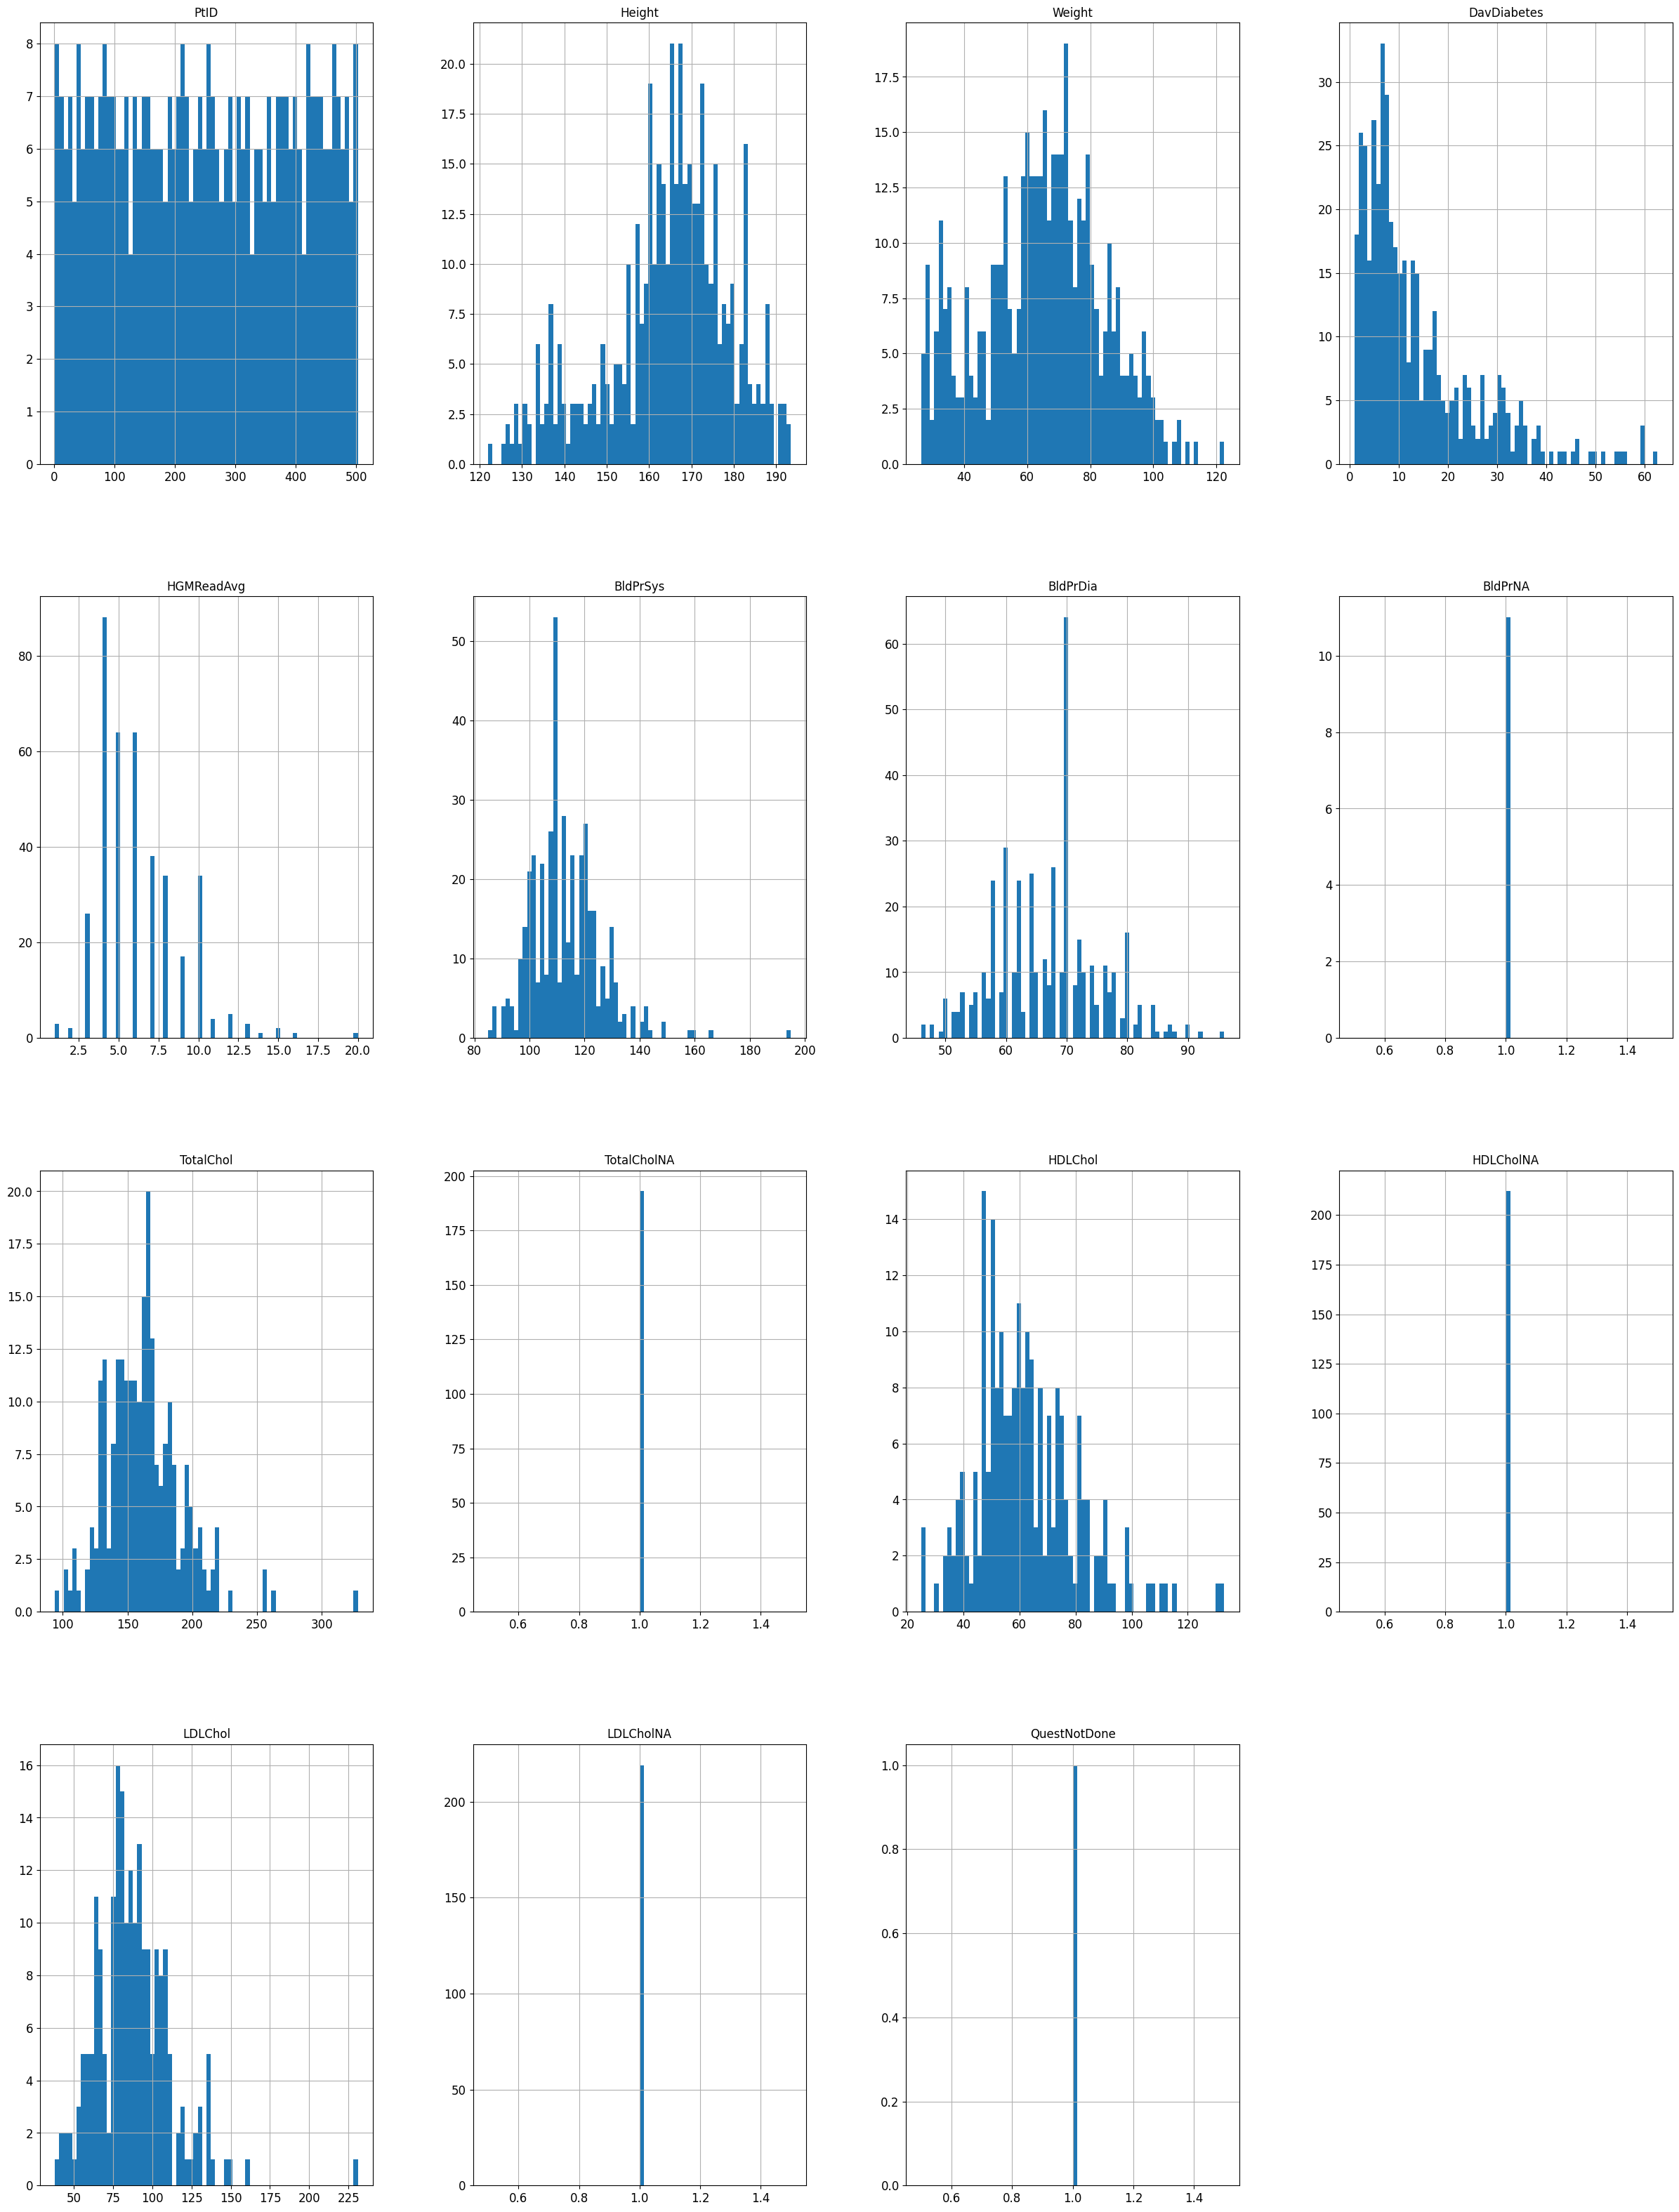

In [9]:
# Histogram
merged_csv.hist(figsize=(30, 40), bins=70, xlabelsize=12, ylabelsize=12); 

<AxesSubplot: title={'center': 'TxGroup'}>

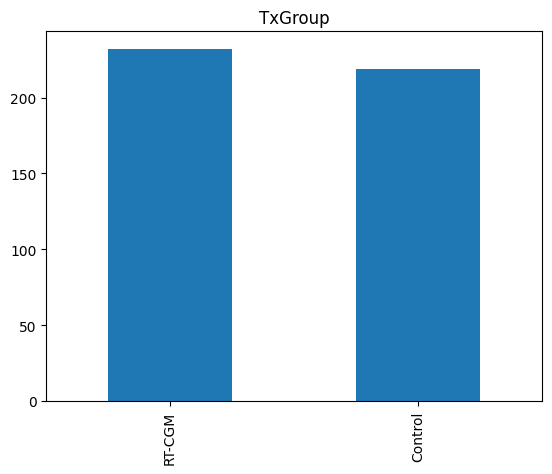

In [10]:
# Plot the groups of the experiment , which will be trying to predict
# It can be seen that it is balanced 
merged_csv['TxGroup'].value_counts().plot.bar(title='TxGroup')

<AxesSubplot: title={'center': 'InsulinModality'}>

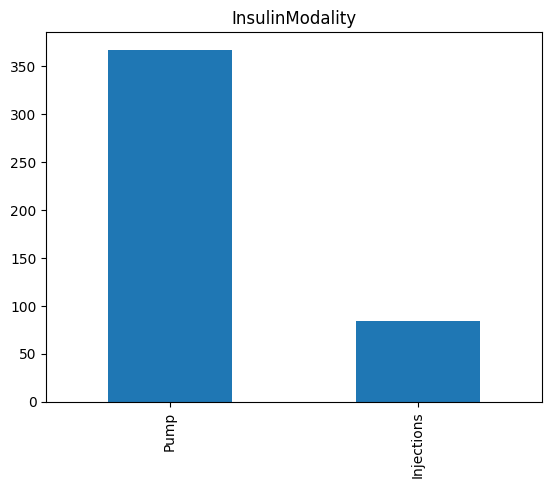

In [11]:
# Plot insulin administration type
merged_csv['InsulinModality'].value_counts().plot.bar(title='InsulinModality')

<AxesSubplot: title={'center': 'NumSevHypo'}>

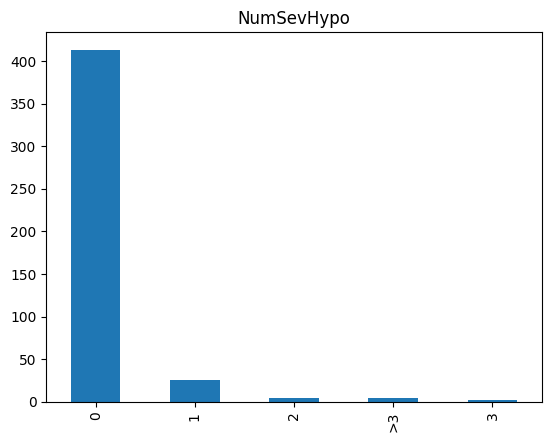

In [12]:
# Plot Number of hypoglycemic seizures in last 6 months 
merged_csv['NumSevHypo'].value_counts().plot.bar(title='NumSevHypo')

<AxesSubplot: title={'center': 'Angiotensin'}>

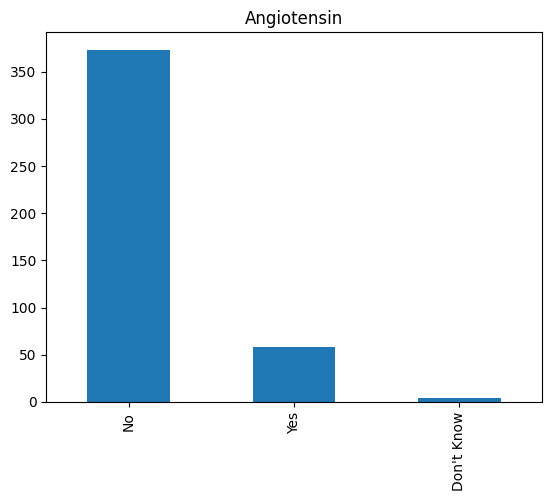

In [13]:
# Patient takes Angiotestin?
merged_csv['Angiotensin'].value_counts().plot.bar(title='Angiotensin')

<AxesSubplot: title={'center': 'Aspirin'}>

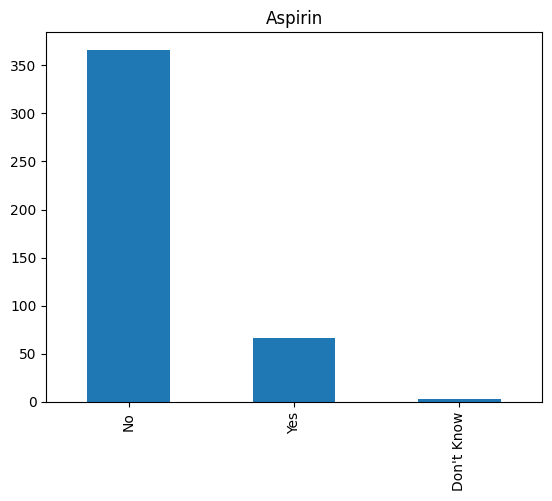

In [14]:
# Patient takes Aspirin?
merged_csv['Aspirin'].value_counts().plot.bar(title='Aspirin')

<AxesSubplot: title={'center': 'Neuropathy'}>

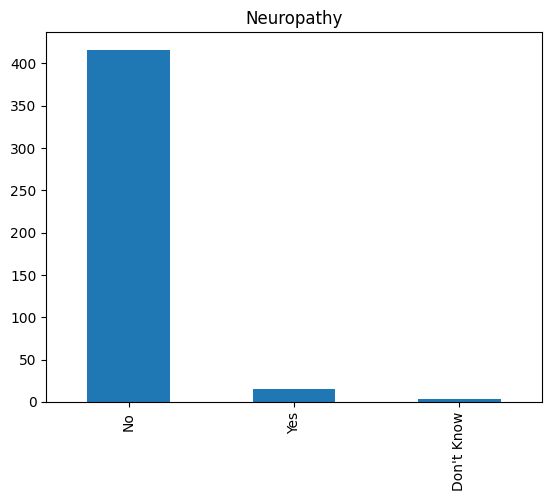

In [15]:
# Symptoms of Neuropathy?
merged_csv['Neuropathy'].value_counts().plot.bar(title='Neuropathy')

<AxesSubplot: title={'center': 'HxSmoke'}>

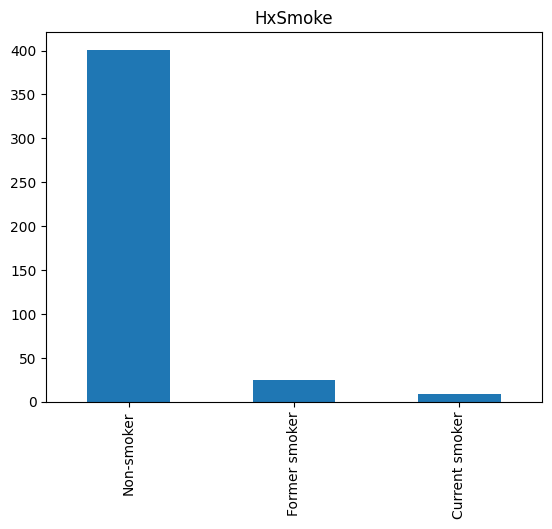

In [16]:
# Smoke?
merged_csv['HxSmoke'].value_counts().plot.bar(title='HxSmoke')

<AxesSubplot: title={'center': 'LaserTx'}>

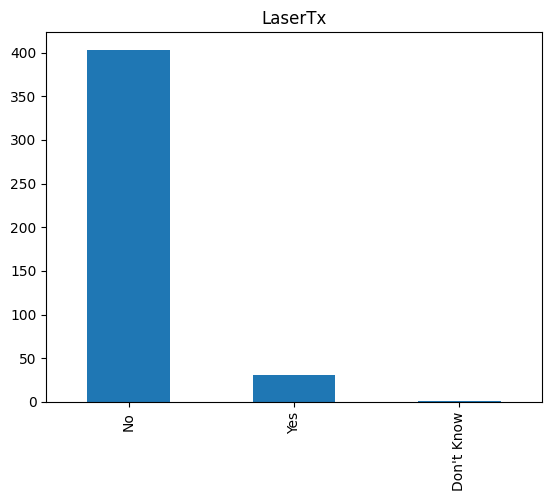

In [17]:
# Laser treatment for diabetic eye disease
merged_csv['LaserTx'].value_counts().plot.bar(title='LaserTx')

# 4. Dealing with Missing Values

In [18]:
# Check for any missing values
merged_csv.isnull().values.any()

True

In [19]:
#Check to which columns the missing values belong to 
merged_csv.isnull().sum()

PtID                 0
Gender               0
Race                 0
Ethnicity            0
Height               0
Weight               0
DavDiabetes          0
InsulinModality      0
NumSevHypo           0
HGMReadAvg          64
EduCareGvrP          0
EduCareGvrPEdu       0
TxGroup              0
SubStudyGrp          0
HxSmoke             16
Angiotensin         16
Aspirin             16
LaserTx             16
Neuropathy          16
BldPrSys            27
BldPrDia            27
BldPrNA            440
TotalChol          209
TotalCholNA        258
HDLChol            228
HDLCholNA          239
LDLChol            235
LDLCholNA          232
QuestNotDone       450
dtype: int64

#### Data Inputation
The values that are null are subsituted with the mean of the column, or, in case they are not numerical values, substituted by the mode of that column.


In [20]:
import numpy as np

for column in merged_csv.columns:
    if(merged_csv[column].dtype == np.float64 or merged_csv[column].dtype == np.int64):
        merged_csv[column].fillna(merged_csv[column].mean(), inplace=True)

    else:
        merged_csv[column].fillna(merged_csv[column].mode()[0], inplace=True)       

In [21]:
# Check that the values have been correctly replaced 

merged_csv.head(10)

,PtID,Gender,Race,Ethnicity,Height,Weight,DavDiabetes,InsulinModality,NumSevHypo,HGMReadAvg,...,BldPrSys,BldPrDia,BldPrNA,TotalChol,TotalCholNA,HDLChol,HDLCholNA,LDLChol,LDLCholNA,QuestNotDone
0,1,F,White,Not Hispanic or Latino,165.5,80.8,29.8,Pump,0,10.0,...,112.000000,60.000000,1.0,180.000000,1.0,99.000000,1.0,68.000000,1.0,1.0
1,10,M,White,Not Hispanic or Latino,192.1,92.3,17.0,Injections,0,3.0,...,114.000000,60.000000,1.0,166.000000,1.0,62.000000,1.0,94.000000,1.0,1.0
2,100,F,White,Not Hispanic or Latino,154.9,68.9,3.4,Pump,0,4.0,...,118.000000,80.000000,1.0,188.000000,1.0,51.000000,1.0,107.000000,1.0,1.0
3,101,F,White,Not Hispanic or Latino,134.1,28.7,1.6,Pump,0,6.0,...,113.162736,66.792453,1.0,162.615702,1.0,62.565022,1.0,87.814815,1.0,1.0
4,102,F,White,Not Hispanic or Latino,129.9,27.6,2.8,Pump,0,10.0,...,113.000000,59.000000,1.0,141.000000,1.0,62.565022,1.0,87.814815,1.0,1.0
5,103,M,White,Not Hispanic or Latino,149.0,35.1,10.1,Pump,0,10.0,...,116.000000,71.000000,1.0,166.000000,1.0,62.565022,1.0,87.814815,1.0,1.0
6,104,M,White,Not Hispanic or Latino,149.0,36.3,6.5,Pump,0,7.0,...,102.000000,57.000000,1.0,162.615702,1.0,62.565022,1.0,87.814815,1.0,1.0
7,105,F,White,Not Hispanic or Latino,163.9,67.8,4.8,Pump,0,6.0,...,119.000000,63.000000,1.0,162.615702,1.0,62.565022,1.0,87.814815,1.0,1.0
8,107,M,White,Not Hispanic or Latino,173.0,75.0,12.1,Pump,0,4.0,...,110.000000,70.000000,1.0,159.000000,1.0,48.000000,1.0,87.000000,1.0,1.0
9,108,M,White,Not Hispanic or Latino,176.0,80.9,27.5,Pump,0,15.0,...,124.000000,78.000000,1.0,155.000000,1.0,44.000000,1.0,83.000000,1.0,1.0


In [22]:
merged_csv.isnull().values.any() # This is expected to be False

False

# 5. Dealing with outliers

PtID               AxesSubplot(0.125,0.712609;0.168478x0.167391)
Height          AxesSubplot(0.327174,0.712609;0.168478x0.167391)
Weight          AxesSubplot(0.529348,0.712609;0.168478x0.167391)
DavDiabetes     AxesSubplot(0.731522,0.712609;0.168478x0.167391)
HGMReadAvg         AxesSubplot(0.125,0.511739;0.168478x0.167391)
BldPrSys        AxesSubplot(0.327174,0.511739;0.168478x0.167391)
BldPrDia        AxesSubplot(0.529348,0.511739;0.168478x0.167391)
BldPrNA         AxesSubplot(0.731522,0.511739;0.168478x0.167391)
TotalChol           AxesSubplot(0.125,0.31087;0.168478x0.167391)
TotalCholNA      AxesSubplot(0.327174,0.31087;0.168478x0.167391)
HDLChol          AxesSubplot(0.529348,0.31087;0.168478x0.167391)
HDLCholNA        AxesSubplot(0.731522,0.31087;0.168478x0.167391)
LDLChol                AxesSubplot(0.125,0.11;0.168478x0.167391)
LDLCholNA           AxesSubplot(0.327174,0.11;0.168478x0.167391)
QuestNotDone        AxesSubplot(0.529348,0.11;0.168478x0.167391)
dtype: object

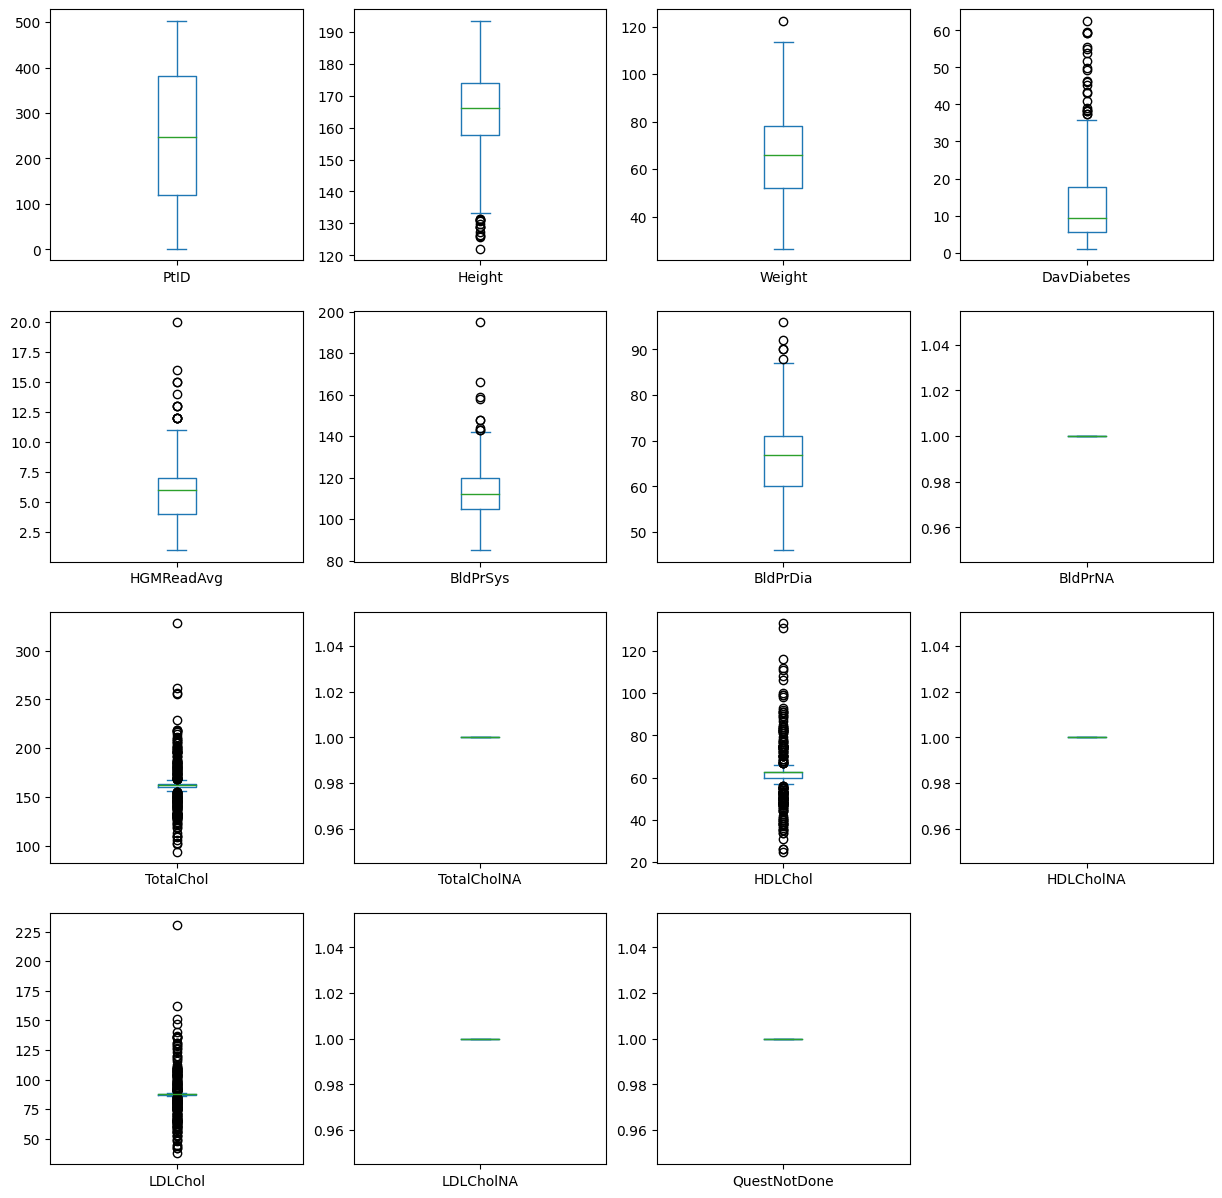

In [23]:
merged_csv.plot(kind='box',subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15))

In [24]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

In [25]:
for column in merged_csv.columns:
    if(merged_csv[column].dtype == np.float64 or merged_csv[column].dtype == np.int64):

        outliers = detect_outliers_iqr(merged_csv[column])
        print(f'Outliers from IQR method of "{column}" column: ', outliers,end="\n\n")

Outliers from IQR method of "PtID" column:  []

Outliers from IQR method of "Height" column:  [122.0, 125.6, 126.1, 126.5, 127.3, 128.9, 129.0, 129.0, 129.9, 130.6, 131.1, 131.1, 131.4, 131.4]

Outliers from IQR method of "Weight" column:  [122.5]

Outliers from IQR method of "DavDiabetes" column:  [37.5, 37.5, 38.2, 38.3, 38.6, 39.0, 40.8, 43.1, 43.4, 45.2, 46.0, 46.3, 49.3, 49.9, 51.8, 54.0, 55.0, 55.6, 59.2, 59.3, 59.5, 62.6]

Outliers from IQR method of "HGMReadAvg" column:  [12.0, 12.0, 12.0, 12.0, 12.0, 13.0, 13.0, 13.0, 14.0, 15.0, 15.0, 16.0, 20.0]

Outliers from IQR method of "BldPrSys" column:  [143.0, 143.0, 144.0, 148.0, 148.0, 158.0, 159.0, 166.0, 195.0]

Outliers from IQR method of "BldPrDia" column:  [88.0, 90.0, 90.0, 92.0, 96.0]

Outliers from IQR method of "BldPrNA" column:  []

Outliers from IQR method of "TotalChol" column:  [94.0, 102.0, 103.0, 106.0, 109.0, 110.0, 110.0, 113.0, 118.0, 119.0, 121.0, 122.0, 123.0, 124.0, 126.0, 127.0, 127.0, 128.0, 128.0, 129.0, 129

# 6. One-hot encoding of the data
In our dataset we are dealing with some categorical variables, such as "Gender" or "Race". The one-hot encoding consists of if a categorical feature can take on k values, we create k binary features.For each record, mark with a 1 the binary feature column to which said record belongs and leave the others with 0. To do this, we are going to use the pandas function pd.get_dummies


In [26]:
# One hot encoding of the file tblAPtSummary using pandas

merged_csv = pd.get_dummies(merged_csv,columns= ["Gender","Race","Ethnicity","InsulinModality","NumSevHypo","EduCareGvrP","EduCareGvrPEdu","HxSmoke", "Angiotensin", "Aspirin","LaserTx", "Neuropathy","TxGroup"])
merged_csv.head(5)

,PtID,Height,Weight,DavDiabetes,HGMReadAvg,SubStudyGrp,BldPrSys,BldPrDia,BldPrNA,TotalChol,...,Aspirin_No,Aspirin_Yes,LaserTx_Don't Know,LaserTx_No,LaserTx_Yes,Neuropathy_Don't Know,Neuropathy_No,Neuropathy_Yes,TxGroup_Control,TxGroup_RT-CGM
0,1,165.5,80.8,29.8,10.0,Secondary,112.000000,60.000000,1.0,180.000000,...,0,1,0,1,0,0,1,0,0,1
1,10,192.1,92.3,17.0,3.0,Primary,114.000000,60.000000,1.0,166.000000,...,1,0,0,1,0,0,1,0,0,1
2,100,154.9,68.9,3.4,4.0,Primary,118.000000,80.000000,1.0,188.000000,...,1,0,0,1,0,0,1,0,1,0
3,101,134.1,28.7,1.6,6.0,Secondary,113.162736,66.792453,1.0,162.615702,...,1,0,0,1,0,0,1,0,1,0
4,102,129.9,27.6,2.8,10.0,Primary,113.000000,59.000000,1.0,141.000000,...,1,0,0,1,0,0,1,0,0,1


# 7. Lab and Hyperglycemic/hypogycemic events
The files corresponding to the laboratory results and the severe glycemic events are preprocessed separetely because there are several entries for each patient 


### **7.1. Laboratory results**

In [27]:
lab_data = pd.read_csv(path + '/tblALabHbA1c.csv')

In [28]:
# Missing values
lab_data.isnull().sum()

RecID                 0
Visit                 0
PtID                  0
LabHbA1cNotDone    2206
LabHbA1cDt            0
LabA1cResult          3
QCA1cResult        1251
LabHbA1cShipDt        0
dtype: int64

In [29]:
# Eliminate empty columns
lab_data.drop([col for col in lab_data.columns if 'RecID' in col], axis=1, inplace=True)
lab_data.drop([col for col in lab_data.columns if 'Visit' in col], axis=1, inplace=True)
lab_data.drop([col for col in lab_data.columns if 'LabHbA1cNotDone' in col], axis=1, inplace=True)

In [30]:
# Dealing with missing values and subtituting them by the mean
lab_data = lab_data.fillna(lab_data.mean())

C:\Users\shree\AppData\Local\Temp\ipykernel_1628\2026793059.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  lab_data = lab_data.fillna(lab_data.mean())


In [31]:
# Group Lab results by Patient ID
lab_results = lab_data.groupby('PtID').apply(lambda x: x['LabA1cResult'].unique())
print(lab_results)

PtID
1      [6.9, 7.2, 7.7, 7.9, 7.8]
2           [9.3, 8.7, 9.4, 8.0]
3      [6.6, 7.5, 8.3, 8.2, 8.0]
4      [8.7, 8.6, 7.6, 8.3, 7.3]
5                [7.4, 7.0, 7.5]
                 ...            
499         [8.6, 7.7, 7.3, 7.2]
500         [5.8, 5.7, 5.9, 5.6]
501                   [7.8, 7.3]
502         [7.1, 7.4, 8.4, 7.7]
503              [7.3, 7.0, 7.1]
Length: 450, dtype: object


In [32]:
# Check that the values have been correctly replaced 
lab_results.isnull().values.any() # This is expected to be False

False

As the laboratory results are timeseries , the tsfresh library is used in order to extract some of the most relevant features .

In [33]:
from tsfresh.feature_extraction import extract_features,MinimalFCParameters

lab_features = extract_features(lab_data, column_id='PtID', column_sort = 'LabHbA1cDt', column_value = 'LabA1cResult', default_fc_parameters=MinimalFCParameters())
lab_features.columns.values[0] = 'PtID'
merge_csv = pd.merge(merged_csv,lab_features,on='PtID',how='outer')


C:\Users\shree\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 12.0.1 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
Feature Extraction: 100%|██████████| 38/38 [00:03<00:00, 10.35it/s]
C:\Users\shree\AppData\Local\Temp\ipykernel_1628\4003191618.py:5: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merge_csv = pd.merge(merged_csv,lab_features,on='PtID',how='outer')


In [34]:
# Check that the extracted features have been merged with the previous files 
merged_csv.head(10)

,PtID,Height,Weight,DavDiabetes,HGMReadAvg,SubStudyGrp,BldPrSys,BldPrDia,BldPrNA,TotalChol,...,Aspirin_No,Aspirin_Yes,LaserTx_Don't Know,LaserTx_No,LaserTx_Yes,Neuropathy_Don't Know,Neuropathy_No,Neuropathy_Yes,TxGroup_Control,TxGroup_RT-CGM
0,1,165.5,80.8,29.8,10.0,Secondary,112.000000,60.000000,1.0,180.000000,...,0,1,0,1,0,0,1,0,0,1
1,10,192.1,92.3,17.0,3.0,Primary,114.000000,60.000000,1.0,166.000000,...,1,0,0,1,0,0,1,0,0,1
2,100,154.9,68.9,3.4,4.0,Primary,118.000000,80.000000,1.0,188.000000,...,1,0,0,1,0,0,1,0,1,0
3,101,134.1,28.7,1.6,6.0,Secondary,113.162736,66.792453,1.0,162.615702,...,1,0,0,1,0,0,1,0,1,0
4,102,129.9,27.6,2.8,10.0,Primary,113.000000,59.000000,1.0,141.000000,...,1,0,0,1,0,0,1,0,0,1
5,103,149.0,35.1,10.1,10.0,Secondary,116.000000,71.000000,1.0,166.000000,...,1,0,0,1,0,0,1,0,0,1
6,104,149.0,36.3,6.5,7.0,Primary,102.000000,57.000000,1.0,162.615702,...,1,0,0,1,0,0,1,0,0,1
7,105,163.9,67.8,4.8,6.0,Primary,119.000000,63.000000,1.0,162.615702,...,1,0,0,1,0,0,1,0,1,0
8,107,173.0,75.0,12.1,4.0,Secondary,110.000000,70.000000,1.0,159.000000,...,1,0,0,1,0,0,1,0,0,1
9,108,176.0,80.9,27.5,15.0,Secondary,124.000000,78.000000,1.0,155.000000,...,1,0,0,1,0,0,1,0,1,0


### **7.2. Hypoglycemia and hyperglycemia events**

In [35]:
glucose_events = pd.read_csv(path + '/tblA_HypoHyperEvents.csv')

glucose_events.drop([col for col in glucose_events.columns if 'RecID' in col], axis=1, inplace=True)
glucose_events.drop([col for col in glucose_events.columns if 'OnsetDt' in col], axis=1, inplace=True)

#The date for each event does not provide with valuable information as the vast majority of the patients have only one hypoglycemia/hyperglycemia event .

### 7.2.1. Count the hypoglycemia events for each patient

In [36]:
print('Hypoglycemia Events Count')

hypo_data = glucose_events[glucose_events.Event == 'Hypoglycemia'].groupby('PtID').count()
hypo_data.rename(columns = {'Event':'Hypoglycemia'}, inplace = True)

print(hypo_data)

Hypoglycemia Events Count
      Hypoglycemia
PtID              
5                1
12               1
13               1
29               1
33               1
37               2
45               1
60               2
64               2
80               1
87               2
91               2
102              1
117              1
132              3
135              1
146              1
149              1
151              1
162              1
163              1
177              2
178              2
192              1
203              1
226              1
229              1
230              2
238              1
242              4
254              1
255              1
258              3
264              2
265              1
269              6
283              1
363              1
367              2
374              1
377              2
383              1
386              1
391              2
395              2
402              2
416              4
419              1
420              1
421  

### 7.2.2. Count the hyperglycemia events for each patient

In [37]:
print('Hyperglycemia Events Count')

hyper_data = glucose_events[glucose_events.Event == 'Hyperglycemia'].groupby('PtID').count()
hyper_data.rename(columns = {'Event':'Hyperglycemia'}, inplace = True)

print(hyper_data)

Hyperglycemia Events Count
      Hyperglycemia
PtID               
291               1
430               1


### 7.2.3 Merge the data from hypogycemia and hyperglycemia events

In [38]:
merged_events = pd.merge(hypo_data, hyper_data, on='PtID', how='outer')
merged_events = merged_events.fillna(0)
print(merged_events)

      Hypoglycemia  Hyperglycemia
PtID                             
5              1.0            0.0
12             1.0            0.0
13             1.0            0.0
29             1.0            0.0
33             1.0            0.0
37             2.0            0.0
45             1.0            0.0
60             2.0            0.0
64             2.0            0.0
80             1.0            0.0
87             2.0            0.0
91             2.0            0.0
102            1.0            0.0
117            1.0            0.0
132            3.0            0.0
135            1.0            0.0
146            1.0            0.0
149            1.0            0.0
151            1.0            0.0
162            1.0            0.0
163            1.0            0.0
177            2.0            0.0
178            2.0            0.0
192            1.0            0.0
203            1.0            0.0
226            1.0            0.0
229            1.0            0.0
230           

### 7.2.4 Merge the events to the rest of the data

In [ ]:
merged_csv = pd.merge(merged_csv,merged_events,on='PtID',how='outer')

#It is assumed that the missing values of the hypoglycemia/hyperglycemia columns are patients that haven't had any of those events
merged_csv[['Hyperglycemia','Hypoglycemia']] = merged_csv[['Hyperglycemia','Hypoglycemia']].fillna(0) 

print(merged_csv.head())


# 8. Continuous Monitoring

The files corresponding to the glucose continuous monitoring are processed separetely because there are several entries for each patient

The files correspoding to the merge of the continuous monitoring data have been precalculated and included in the dataset (merged_monitoring.csv) to avoid unnecesary calculations.

In [ ]:

# merged_monitoring = pd.concat([pd.read_csv(csv_monitoring[0]), pd.read_csv(csv_monitoring[1])], axis=0)
# for element in csv_monitoring[2:]:

#    merged_monitoring = pd.concat([merged_monitoring , pd.read_csv(element)], axis=0)

#    merged_monitoring.to_csv('merged_monitoring.csv')

The files correspoding to the extraction of features from the continuous monitoring data have been precalculated and included in the dataset (monitoring_features_efficient.csv and monitoring_features_minimal.csv) to avoid unnecesary calculations.

In [ ]:
# from tsfresh.feature_extraction import extract_features, EfficientFCParameters, MinimalFCParameters

# df = pd.read_csv(path + '/DataRTCGM_All.csv')

# X = extract_features(df, column_id='PtID', column_sort = 'DeviceDtTm', column_value = 'Glucose', default_fc_parameters=MinimalFCParameters())
# X = extract_features(df, column_id='PtID', column_sort = 'DeviceDtTm', column_value = 'Glucose', default_fc_parameters=EfficientFCParameters())

# X.to_csv('monitoring_features_minimal.csv')
# X.to_csv('monitoring_features_efficient.csv')

# X.columns.values[0] = 'PtID'


In [39]:
# Merge Continuos Glucose Monitoring Datasets

features = pd.read_csv(path + '/monitoring_features_efficient.csv')
features.head()

,Unnamed: 0,PtID,Glucose__variance_larger_than_standard_deviation,Glucose__has_duplicate_max,Glucose__has_duplicate_min,Glucose__has_duplicate,Glucose__sum_values,Glucose__abs_energy,Glucose__mean_abs_change,Glucose__mean_change,...,Glucose__permutation_entropy__dimension_5__tau_1,Glucose__permutation_entropy__dimension_6__tau_1,Glucose__permutation_entropy__dimension_7__tau_1,"Glucose__matrix_profile__feature_""min""__threshold_0.98","Glucose__matrix_profile__feature_""max""__threshold_0.98","Glucose__matrix_profile__feature_""mean""__threshold_0.98","Glucose__matrix_profile__feature_""median""__threshold_0.98","Glucose__matrix_profile__feature_""25""__threshold_0.98","Glucose__matrix_profile__feature_""75""__threshold_0.98",Glucose__mean_n_absolute_max__number_of_maxima_7
0,0,1,1.0,1.0,1.0,1.0,3338408.0,5.821796e+08,3.049112,-0.003420,...,2.484656,3.164298,3.855503,2.790524,12.017489,6.622180,6.600702,5.344739,7.670811,371.714286
1,1,2,1.0,1.0,1.0,1.0,2162140.0,4.390312e+08,3.816938,0.000000,...,2.417720,3.071217,3.740013,2.480735,11.955370,6.068960,5.888970,5.090677,6.966998,488.857143
2,2,3,1.0,1.0,1.0,1.0,1296523.0,3.117884e+08,10.032970,0.028495,...,3.465368,4.512516,5.461549,2.022307,9.191316,5.093221,5.032364,4.176513,5.993902,401.000000
3,3,4,1.0,1.0,1.0,1.0,5492010.0,1.381381e+09,5.299244,-0.009083,...,2.506969,3.206393,3.923726,2.746071,12.449330,6.435338,6.304154,5.343222,7.439605,654.000000
4,4,5,1.0,1.0,1.0,1.0,5648769.0,9.383326e+08,7.006875,0.001820,...,3.015422,3.931245,4.874712,2.137492,8.878526,4.801210,4.760072,3.987006,5.546742,435.857143


# 9. Final results from preprocessing

In [40]:
classification_data  = pd.merge(merged_csv, features,on='PtID', how='outer')

classification_data.to_csv('classification_data_V4.csv') #All the preprocesing calcuations are saved to avoid unnecesary computation

In [41]:
classification_data.head()

,PtID,Height,Weight,DavDiabetes,HGMReadAvg,SubStudyGrp,BldPrSys,BldPrDia,BldPrNA,TotalChol,...,Glucose__permutation_entropy__dimension_5__tau_1,Glucose__permutation_entropy__dimension_6__tau_1,Glucose__permutation_entropy__dimension_7__tau_1,"Glucose__matrix_profile__feature_""min""__threshold_0.98","Glucose__matrix_profile__feature_""max""__threshold_0.98","Glucose__matrix_profile__feature_""mean""__threshold_0.98","Glucose__matrix_profile__feature_""median""__threshold_0.98","Glucose__matrix_profile__feature_""25""__threshold_0.98","Glucose__matrix_profile__feature_""75""__threshold_0.98",Glucose__mean_n_absolute_max__number_of_maxima_7
0,1,165.5,80.8,29.8,10.0,Secondary,112.000000,60.000000,1.0,180.000000,...,2.484656,3.164298,3.855503,2.790524,12.017489,6.622180,6.600702,5.344739,7.670811,371.714286
1,10,192.1,92.3,17.0,3.0,Primary,114.000000,60.000000,1.0,166.000000,...,3.340347,4.379067,5.430734,2.210765,10.220216,4.991079,4.880545,4.158491,5.697431,407.428571
2,100,154.9,68.9,3.4,4.0,Primary,118.000000,80.000000,1.0,188.000000,...,2.808331,3.635105,4.490721,3.002057,13.003564,7.148673,7.041049,5.840457,8.310643,596.285714
3,101,134.1,28.7,1.6,6.0,Secondary,113.162736,66.792453,1.0,162.615702,...,3.253774,4.111724,4.801885,1.458738,6.856114,3.036056,2.641531,2.087954,3.863484,280.857143
4,102,129.9,27.6,2.8,10.0,Primary,113.000000,59.000000,1.0,141.000000,...,3.170617,4.164284,5.192752,2.042971,8.838021,4.671116,4.604393,3.921318,5.352179,386.571429


# Here, remove the columns with null in classification

In [42]:
classification_data.isnull().values.any() # This is expected to be False


False

In [43]:
regression_data  = pd.merge(hypo_data, features,on='PtID', how='outer')
regression_data = regression_data.fillna(0)

regression_data.to_csv('regression_data_V2.csv')

In [44]:
regression_data.head()

,PtID,Hypoglycemia,Unnamed: 0,Glucose__variance_larger_than_standard_deviation,Glucose__has_duplicate_max,Glucose__has_duplicate_min,Glucose__has_duplicate,Glucose__sum_values,Glucose__abs_energy,Glucose__mean_abs_change,...,Glucose__permutation_entropy__dimension_5__tau_1,Glucose__permutation_entropy__dimension_6__tau_1,Glucose__permutation_entropy__dimension_7__tau_1,"Glucose__matrix_profile__feature_""min""__threshold_0.98","Glucose__matrix_profile__feature_""max""__threshold_0.98","Glucose__matrix_profile__feature_""mean""__threshold_0.98","Glucose__matrix_profile__feature_""median""__threshold_0.98","Glucose__matrix_profile__feature_""25""__threshold_0.98","Glucose__matrix_profile__feature_""75""__threshold_0.98",Glucose__mean_n_absolute_max__number_of_maxima_7
0,5,1.0,4,1.0,1.0,1.0,1.0,5648769.0,9.383326e+08,7.006875,...,3.015422,3.931245,4.874712,2.137492,8.878526,4.801210,4.760072,3.987006,5.546742,435.857143
1,12,1.0,11,1.0,0.0,1.0,1.0,680838.0,1.617183e+08,10.795751,...,2.702757,3.426720,4.104113,1.967546,8.515798,5.020311,4.963814,4.187483,5.818842,452.857143
2,13,1.0,12,1.0,1.0,1.0,1.0,1472522.0,2.533665e+08,7.444613,...,3.645801,4.804125,5.909097,2.367896,11.916088,6.228335,6.111504,5.008626,7.350506,401.000000
3,29,1.0,27,1.0,1.0,0.0,1.0,3313532.0,5.868728e+08,6.294895,...,3.025785,3.931710,4.841986,2.188897,9.782142,5.142076,5.149760,4.338330,5.857906,501.000000
4,33,1.0,30,1.0,1.0,1.0,1.0,8067616.0,1.676282e+09,4.046097,...,2.622406,3.361828,4.125886,3.050349,14.605398,7.579555,7.528717,6.418708,8.731262,630.285714


# 10. Split into Train, Validation and Test set

We are going to use the **train_test_split** function from sklearn to divide our initial set into Train and Test sets. With this procedure we can simulate how a model would perform on unseen data. 

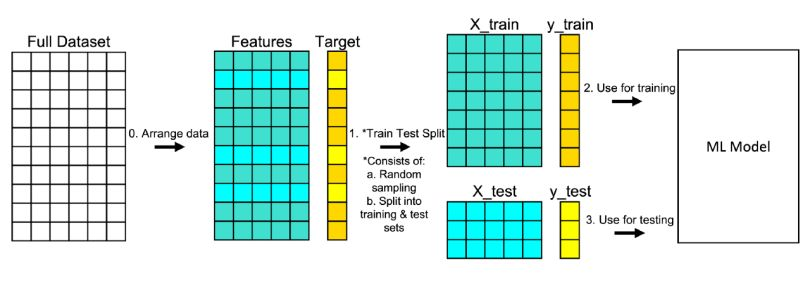

To achieve this we split our dataset into two pieces by using a random sampling without replacement. The argument ***test_size*** is going to determine the remaining percentage that we will put into our test set. Next, we obtain the Validation set by repeting the same process but with the Training set.

Now our initial dataset is divided into Training (80%) and Test (20%) sets. We are going to forget about the Test set for now, we are going to reserve it as a truly exogenous dataset to test how well the model works.


In [45]:
# We create a dataframe exclusively containing the labels for each patient. We did a previous one hot encoding because the Group variable was categorical. 
# We only need to use one of thm. 
target = classification_data["TxGroup_Control"]
y_class = target.to_frame()

# Drop columns that won't be used. Such as patient ID...

X_class = classification_data.drop(["PtID","TxGroup_Control","TxGroup_RT-CGM","BldPrNA",'TotalCholNA','HDLCholNA','LDLCholNA','QuestNotDone'],axis=1)


In [46]:
X_class.head()

,Height,Weight,DavDiabetes,HGMReadAvg,SubStudyGrp,BldPrSys,BldPrDia,TotalChol,HDLChol,LDLChol,...,Glucose__permutation_entropy__dimension_5__tau_1,Glucose__permutation_entropy__dimension_6__tau_1,Glucose__permutation_entropy__dimension_7__tau_1,"Glucose__matrix_profile__feature_""min""__threshold_0.98","Glucose__matrix_profile__feature_""max""__threshold_0.98","Glucose__matrix_profile__feature_""mean""__threshold_0.98","Glucose__matrix_profile__feature_""median""__threshold_0.98","Glucose__matrix_profile__feature_""25""__threshold_0.98","Glucose__matrix_profile__feature_""75""__threshold_0.98",Glucose__mean_n_absolute_max__number_of_maxima_7
0,165.5,80.8,29.8,10.0,Secondary,112.000000,60.000000,180.000000,99.000000,68.000000,...,2.484656,3.164298,3.855503,2.790524,12.017489,6.622180,6.600702,5.344739,7.670811,371.714286
1,192.1,92.3,17.0,3.0,Primary,114.000000,60.000000,166.000000,62.000000,94.000000,...,3.340347,4.379067,5.430734,2.210765,10.220216,4.991079,4.880545,4.158491,5.697431,407.428571
2,154.9,68.9,3.4,4.0,Primary,118.000000,80.000000,188.000000,51.000000,107.000000,...,2.808331,3.635105,4.490721,3.002057,13.003564,7.148673,7.041049,5.840457,8.310643,596.285714
3,134.1,28.7,1.6,6.0,Secondary,113.162736,66.792453,162.615702,62.565022,87.814815,...,3.253774,4.111724,4.801885,1.458738,6.856114,3.036056,2.641531,2.087954,3.863484,280.857143
4,129.9,27.6,2.8,10.0,Primary,113.000000,59.000000,141.000000,62.565022,87.814815,...,3.170617,4.164284,5.192752,2.042971,8.838021,4.671116,4.604393,3.921318,5.352179,386.571429


Prepara data for regression 


In [47]:
# We create a dataframe exclusively containing the labels for each patient. We did a previous one hot encoding because the Group variable was categorical. 
# We only need to use one of them. 
target = regression_data["Hypoglycemia"]
y_reg = target.to_frame()

# Drop columns that won't be used. Such as patient ID...
X_reg = regression_data.drop(["PtID","Hypoglycemia"],axis=1)

In [48]:
from sklearn.model_selection import train_test_split
#split the data using sklearn routine. A 20% of the patient records will be separated to have unseen data with which to evaluate the model
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class,y_class,test_size=0.2, random_state=10)
print("X_class_train.shape", X_class_train.shape, "y_class_train.shape", y_class_train.shape)
print("X_class_test.shape", X_class_test.shape, "y_class_test.shape", y_class_test.shape)

# Esto lo hago porque si no me da un warning luego
y_class_train = y_class_train.to_numpy()
y_class_train = y_class_train.ravel()
y_class_test = y_class_test.to_numpy()
y_class_test = y_class_test.ravel()

X_class_train.shape (360, 832) y_class_train.shape (360, 1)
X_class_test.shape (91, 832) y_class_test.shape (91, 1)


In [49]:
from sklearn.model_selection import train_test_split

#split the data using sklearn routine. A 20% of the patient records will be separated to have unseen data with which to evaluate the model
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg,y_reg,test_size=0.2, random_state=40)
print("X_reg_train.shape", X_reg_train.shape, "y_reg_train.shape", y_reg_train.shape)
print("X_reg_test.shape", X_reg_test.shape, "y_reg_test.shape", y_reg_test.shape)

X_reg_train.shape (360, 778) y_reg_train.shape (360, 1)
X_reg_test.shape (91, 778) y_reg_test.shape (91, 1)


# 11. Normalization of the data

In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_class = MinMaxScaler()

scaler_class = scaler_class.fit(X_class_train)
X_class_train = scaler_class.transform(X_class_train)
X_class_test = scaler_class.transform(X_class_test)

ValueError: could not convert string to float: 'Primary'

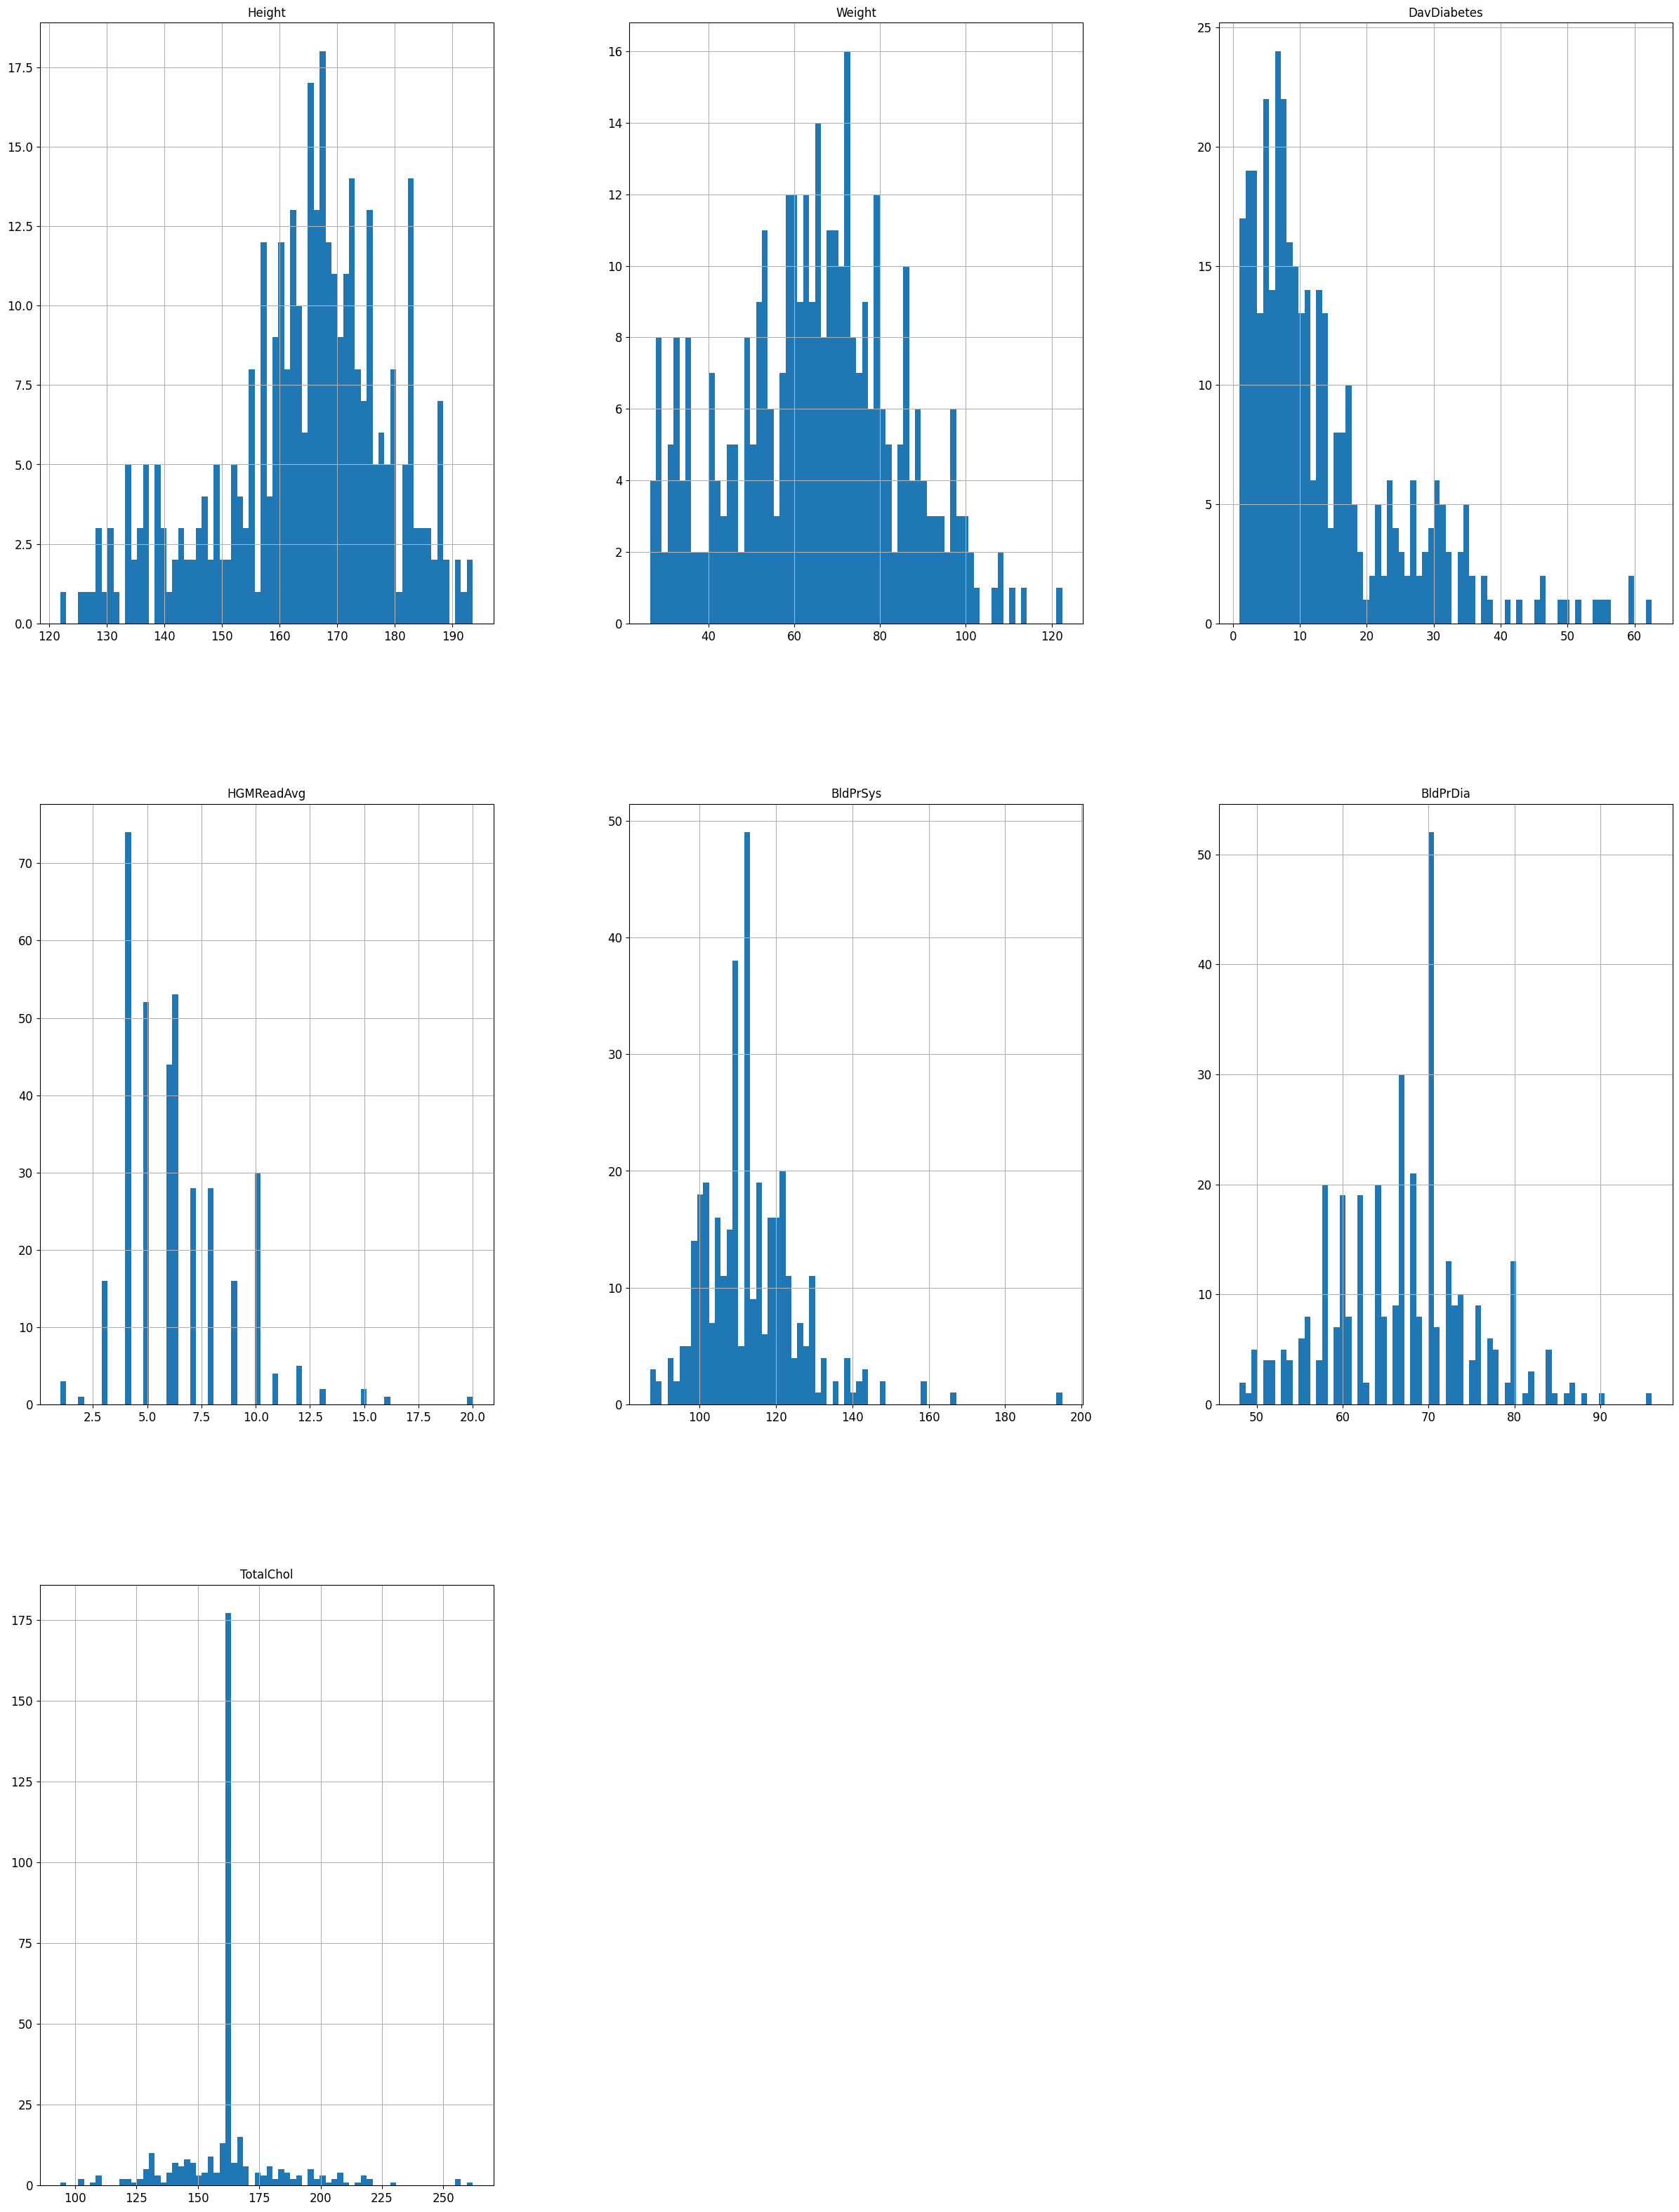

In [52]:
df= pd.DataFrame(X_class_train,columns=X_class.columns)
df.head()

# Histogram
df[X_class.columns[:8]].hist(figsize=(30, 40), bins=70, xlabelsize=12, ylabelsize=12); 

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler_reg = MinMaxScaler()

X_reg_train = scaler_reg.fit_transform(X_reg_train)
X_reg_test = scaler_reg.transform(X_reg_test)

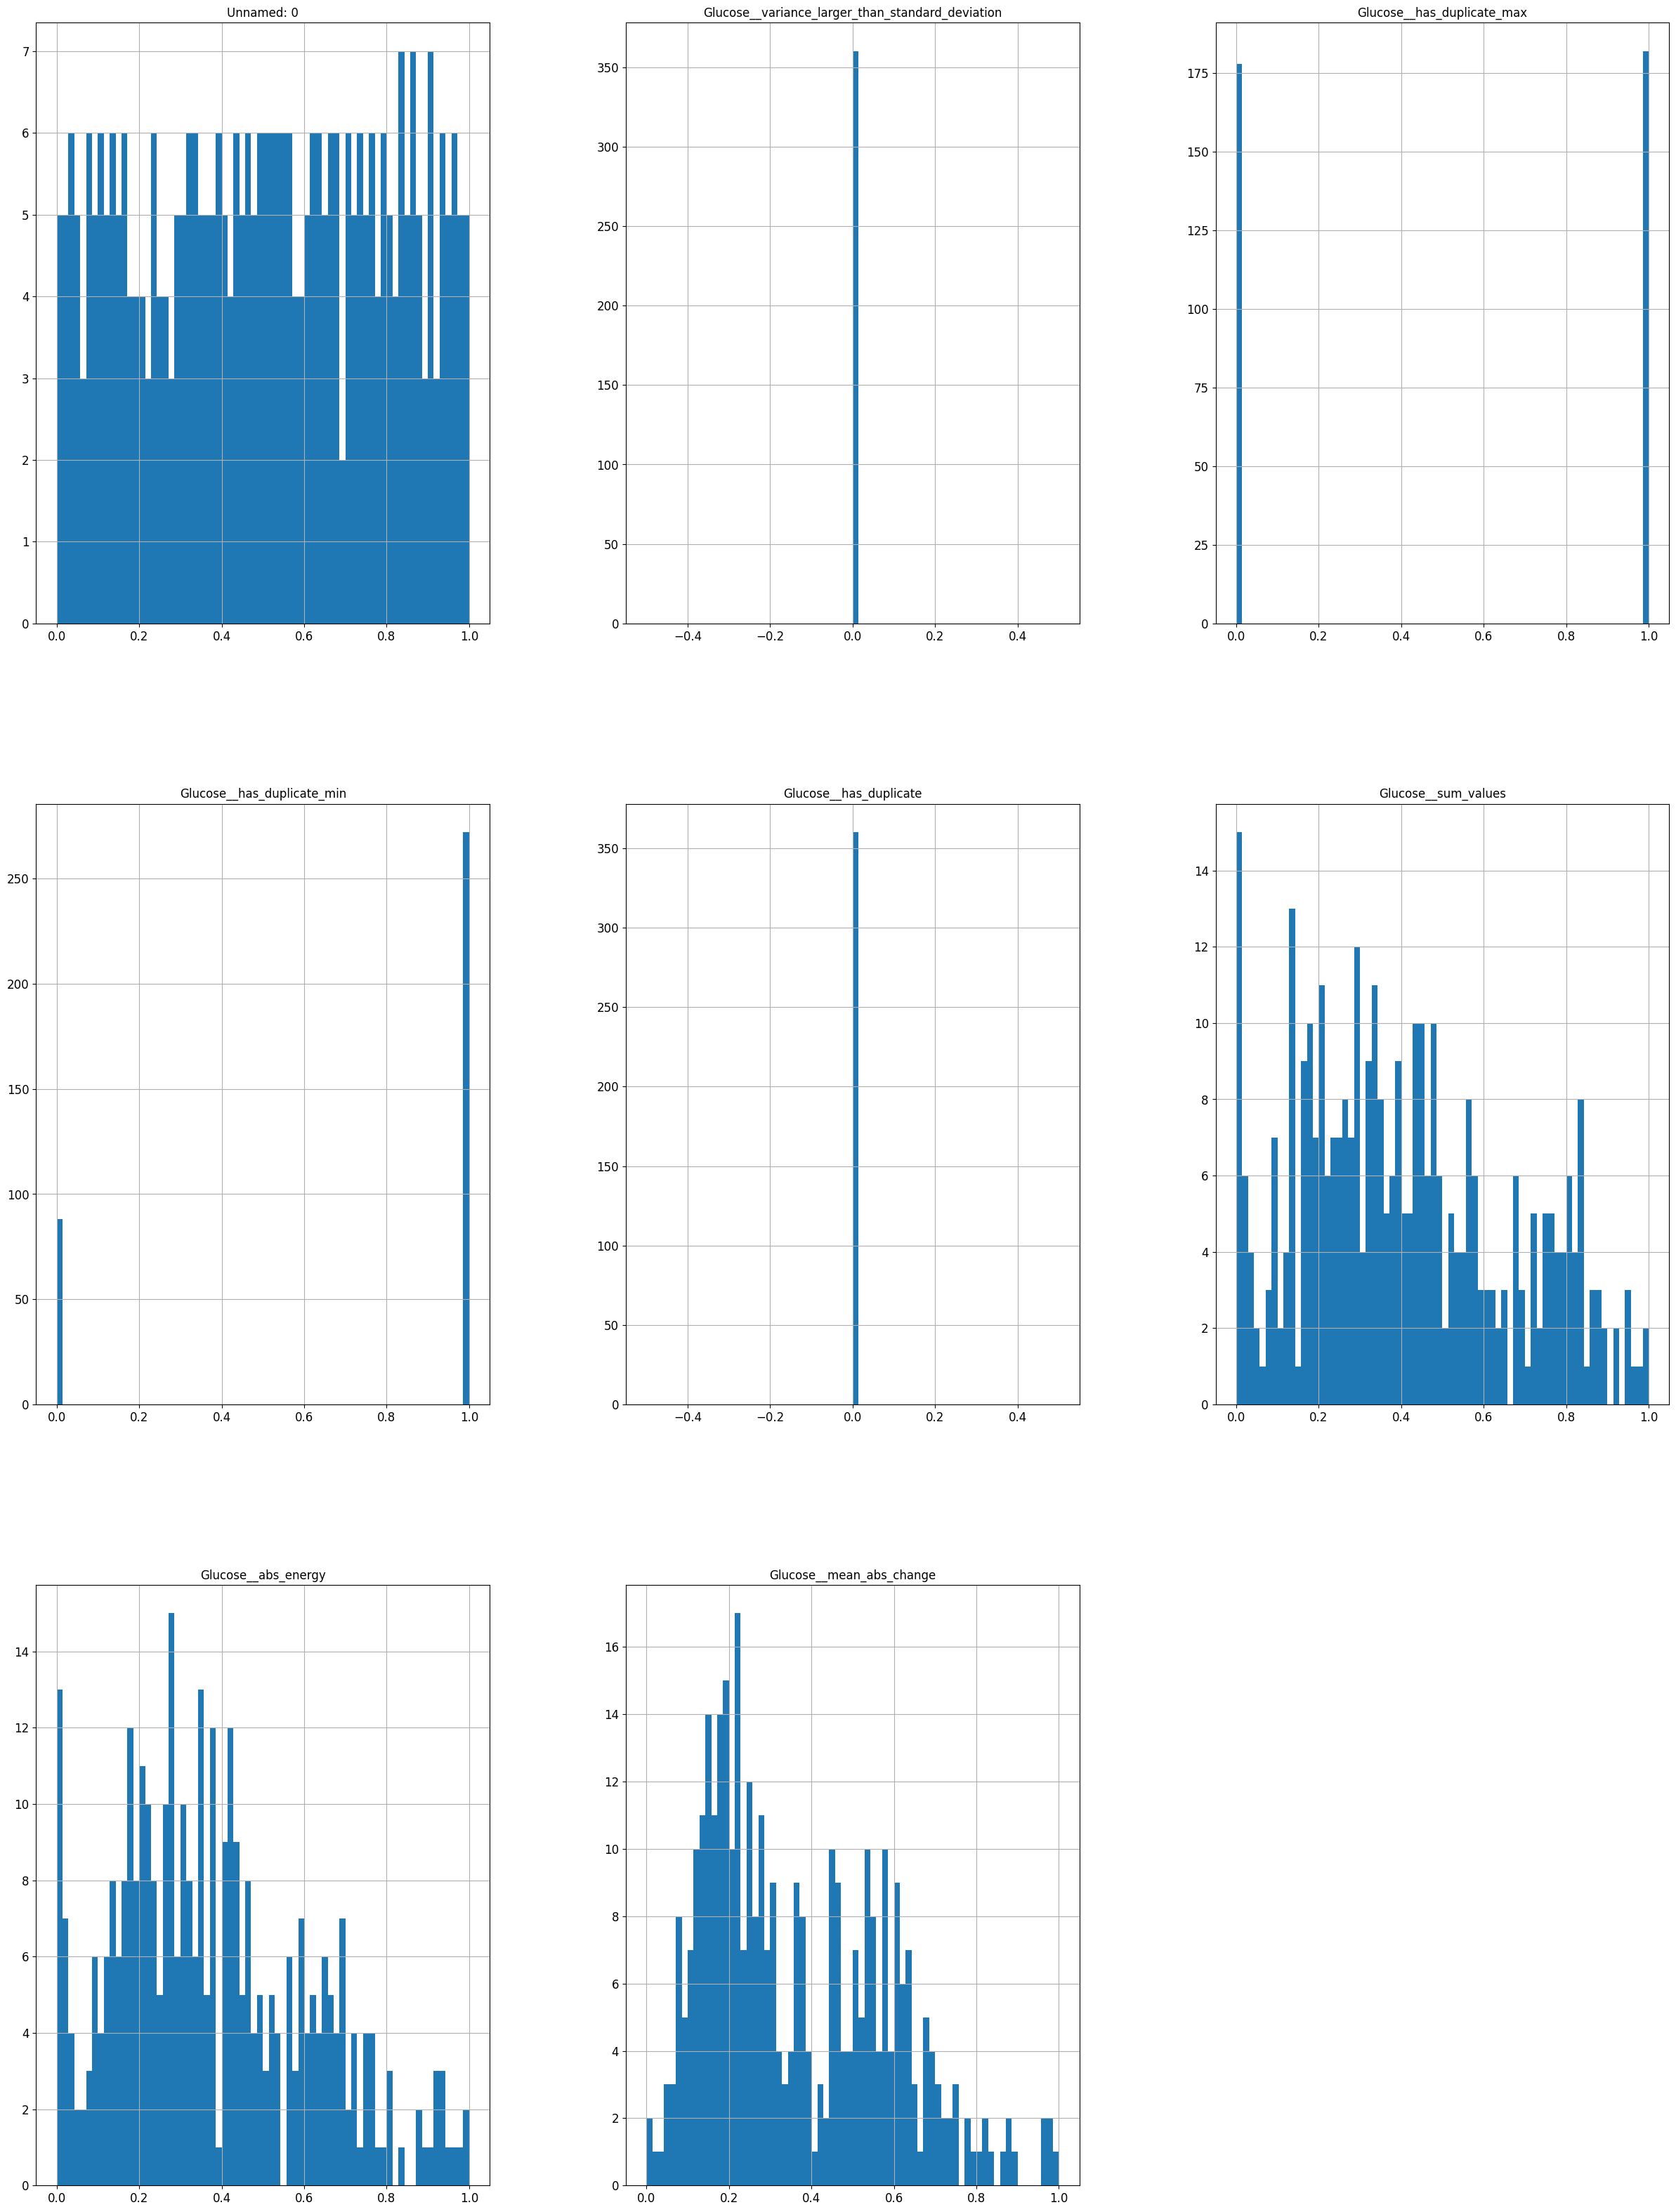

In [54]:
df= pd.DataFrame(X_reg_train,columns=X_reg.columns)

# Histogram
df[X_reg.columns[:8]].hist(figsize=(30, 40), bins=70, xlabelsize=12, ylabelsize=12); 

# Classification Model

In [55]:
#X_class_train, X_class_test, y_class_train, y_class_test

# Logistic Regression

For a classification task, we can start by using our Linear Regression model,  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b$, to predict $y$ given $x$. 

However, we would like the predictions of our classification model to be between 0 and 1 since our output variable  𝑦  is either 0 or 1.
This can be accomplished by using a Sigmoid Function which maps all input values to values between 0 and 1.

The formula for a Sigmoid Function is as follows:

$g(z) = \frac{1}{1+e^{-z}}\tag{1}$ 

And it is graphically represented as:

**Foto**

In the case of logistic regression, $z$ (the input to the sigmoid function), is the output of a linear regression model.
In the case of multiple examples, $z$  may be a vector consisting of  𝑚  values, one for each example.

Therefore the expression for the Logistic Regression can be defined as:
$$ f_{\mathbf{w},b}(\mathbf{x}) = g(\mathbf{w} \cdot \mathbf{x} + b ) \tag{2} $$ 

Where $g(z)$ is the Sigmoid Function.

We think about the Logistic Regression output as outputting the probability of the predicted class of being one given an input $\mathbf{x}$, parameters $\mathbf{w}$,$b$:

$$ f_{\mathbf{w},b}(\mathbf{x}) = P(\mathbf{y} = 1| \mathbf{x};\mathbf{w}, b ) \tag{2} $$ 

**Cost Function for Logistic Regression**

The Cost Function gives us information about the error made by our model, allowing us to know how well the parameters fit our data.
However, for Logistic Regression this function is non-convex, meaning that we need to modify it. 

A simplifed version for this Cost Function is:

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right] $$

In order to achieve a better model performance, we want to minimize this Cost Function by choosing the optimal parameters. To do this, we decided to use the Gradient Descent algorith.
Gradient Descent is an iterative optimization algorithm, which considers the derivative with respect to the model parameters, by trying different values and updating them until reaching the optimal ones, which will minimize the Cost Function.

The basic algorithm for running Gradient Descent is:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$
Where each iteration performs simultaneous updates on $w_j$ for all $j$.

The parameter **𝛼** is the Learning Rate, which has a direct impact on the algorithm's performance. If  **𝛼** is too small, the algorithm still works, but it will take a long time and higher computational cost. On the other hand, if  **𝛼** is too big, the algorithm may not converge.

Moreover, there are two approaches when running Gradient Descent: batch and stochastic. The bacth approach uses all the training examples for each iteration while making an adjustment to the model parameters trying to minimize the error. On the other hand, stochastic method randomly selects one training example at each iteration. SDG has the advantage of being pretty useful when dealing with large datasets. 

Since we are dealing with a set of data that contains a large number of features, we opted by doing Stochastic Gradient Method. However, since we are using the Logistic Regression function from Scikit-Learn, we need to adapt to the solvers that the function is using, we decided to use the "saga" solver. 


SAGA stands for Stochastic Average Gradient Accelerated Method. This solver is based on a variant of the SGD, which is the Averaged SGD (SAG). The basic idea is to do regular SGD and then take the mean as the final solution for the parameter. The aim of averaging is to reduce the noise effect and give a solution closer to the optimum. Accelarated refers to the fact that the Learning Rate is automatically calculated, so we don't need to worry about it at all. 

We also decided to use the SAGA solver because it allow us to work with different regularization penalties (we will see what this means later) and without.

**Hyperparameter Tuning and Cross-Validation**



 A hyperparameter is not the same as a parameter. The parameters are variables internal to the model and whose value is learn from data. In our case, the weights for Logistic Regression are parameters, while the Learning Rate or the number of iterations are hyperparameters. 

So, what we are going to do is tuning some hyperparameters of the model to discover the Logistic Regression weights that result in the best predictions possible for a specific problem. In our case, we are going to tune the model to obtain the best ROC-AUC score possible.

During the training and model tuning, the model should not see the Test set. But, how can we know if the model is doing well? If we train the model and judge its performance using the same data, we would obtain overly optimistic results. 
To solve this, we have Cross-Validation. More specifically, we will use K-Fold Cross-Validation , which consists of shuffling the training data and divide it into k folds. Each of the k partitions will be used as a validation set of unseen data, while the rest will serve as training sets. This process is repeated k times. 

In [ ]:
from sklearn.linear_model import LogisticRegression

# Once we have found the optimal number of iterations, we can build the an optimal Logistic Regression model
logreg = LogisticRegression(solver="saga",penalty="none")
# Fit the model with our training data
logreg.fit(X_class_train, y_class_train)

**Understanding the Logistic Regression coefficients**

We started with the concept of probability for predicting the class 1. Then, the probbility of predicting class 0 is $1 - f_{\mathbf{w},b}(\mathbf{x})$. The odds of predicting class 1 are defined as the ratio of the probability of predicting class 1 over the probability of predicting class 0. Similarly the odds of predicting class 0 is defined as the probability of predicting class 0 divided by the probability of predicting class 1. 

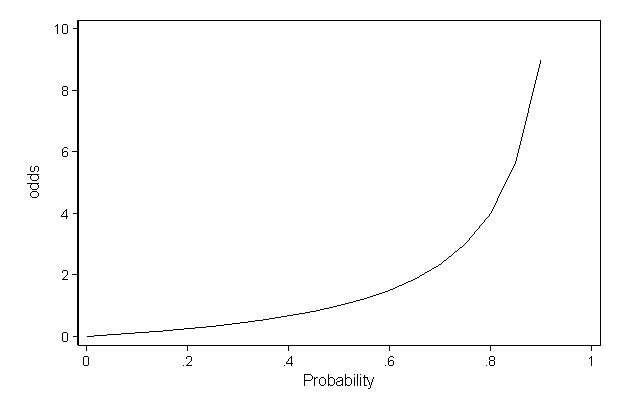

We can also apply a logarithm transformation to the odds and obtain the the log of odds.

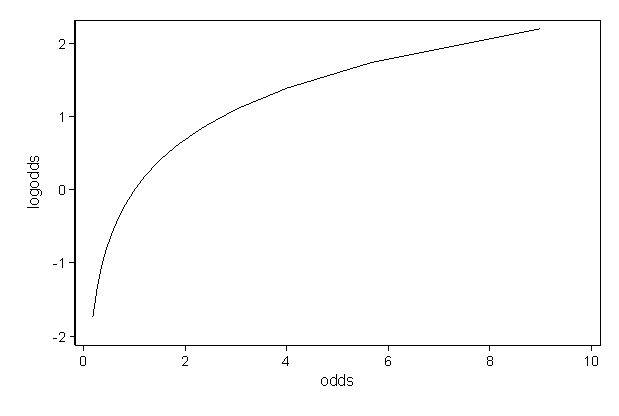

This transformation from probability to the log of odds is called the **logit transformation**. We needed to explain this since it will allow us to understand the true nature of the Logistic Regression coefficients.


Logistic Regression allows us to establish a relationship between a binary outcome variable and a group of predictor variables, by modeling the logit-transformed probability as a linear relationship with the predictor variables.


The odds ratios (odds of predicting class 1/odds of predicting class 0) are the exponential of the corresponding Logistic Regression coefficient, and they are measurements of association between a possible causal effect and an outcome. On our case, we are evaluating the association between an outcome and the value of each feature. 

In [ ]:
coefficients = logreg.coef_
coefficients = coefficients[0]
print(coefficients)
sorted_coeff = np.sort(coefficients)


These coefficients are log odds, if we exponentiate them, they will be converted into odds. 
A positive coefficient has odds above one, meaning that the odds of predicting class one are increased.
Whereas, a negative coefficient has odds below one, the odds of predicting class one are decreased. 

As a first approximation, a large positive coefficient implies that high values of that feature push the probability of predicting class 1 towards 1. So this feature is good when predicting class 1. 
On the other hand, a coefficient with a large negative values means that high values of that feature push that probability towards 0, which means that the feature is good for predicting class 0. 

Since we have a large number of coefficients, we will look at the top term for both of our labels.

In [ ]:
# These are the highest positive coefficients, the features associated with them are the ten best in predicting class 1
coeff_pos = sorted_coeff[-11:-1]
coeff_pos = np.flip(coeff_pos)
coeff_pos = coeff_pos.tolist()
features_pos = ["Glucose__fft_coefficient__attr_angle__coeff_19", "Glucose__fft_coefficient__attr_angle__coeff_55" , "Glucose__fft_coefficient__attr_abs__coeff_79","Glucose__fft_coefficient__attr_abs__coeff_98", "Glucose__fft_coefficient__attr_angle__coeff_89","HGMReadAvg","Glucose__has_duplicate_max", "Glucose__fft_coefficient__attr_imag__coeff_19",
"Glucose__fft_coefficient__attr_imag__coeff_6","Glucose__fft_coefficient__attr_angle__coeff_49"]
df = {"features":features_pos,"coefficients":coeff_pos}
pd.DataFrame(data=df)

As we said odds ratios are the exponential of a regression coefficient. Let's see for example the coefficient of the variable "Glucose__fft_coefficient__attr_angle__coeff_19". If this coefficient is __ , the odds ratio will be __. The odds ratio shows how the odds chance for a unit increase in the value of "Glucose__fft_coefficient__attr_angle__coeff_19", which changes for a value of ___. 

In [ ]:
# These are the highest positive coefficients, the features associated with them are the ten best in predicting class 1
coeff_neg = sorted_coeff[0:10]
coeff_neg = coeff_neg.tolist()
features_neg = ["Glucose__fft_aggregated__aggtype_variance", "Glucose__fft_coefficient__attr_angle__coeff_83", "Glucosefft_coefficient__attr_angle__coeff_74", "Glucosefft_coefficient__attr_abs__coeff_76", "Glucosefft_coefficient__attr_angle__coeff_41","Glucosefft_coefficient__attr_abs__coeff_90", "Glucosefft_coefficient__attr_angle__coeff_51", "Glucosefft_coefficient__attr_angle__coeff_33", "Glucosefft_coefficient__attr_imag__coeff_90", "Glucosefft_coefficient__attr_real__coeff_88"]
df = {"features":features_neg,"coefficients":coeff_neg}
pd.DataFrame(data=df)

Similarly, if we compute the odds ratio for the coefficient associated with "Glucose__fft_aggregated__aggtype_variance", which is negative, the odds ratio is __. This means that if we increase a unit the value of this feature, the odds ratio will decrease by a factor of___.

# Regularized Logistic Regression

Regularization consists of reducing the size of the parameters *$w_j$* by introducing a penalization to the Cost Function, preventing them for a having a large effect on the model, which may be the cause of our overfitting. We can also regularize the parameter $b$, but it is not mandatory since it makes a small difference. 

The idea behind Regularization is that using smaller values for the parameters gives us a simpler model which is less likely to overfit. However, most of the time we don’t know which parameters we should regularize. Therefore, we apply it to all of them, resulting in the following Cost Function:

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^q \tag{1}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{2} $$ 

Here **𝜆** is the Regularization Parameter, a trade-off between the original Cost Function and the Regularization Term.
Additionally, we see the **$q$** parameter, which is going to determine the type of Regularization we are applying. We have two main types of Regularization:

- When the value of **$q$** is 1, we have Least Absolute Shrinkage and Selection Operator,Lasso, which is used both for regularization and model selection. It is also called L1 Regularization.
- When the value of **$q$** is 2, we have Ridge Regularization, which takes the square of the magnitude of the coefficients. It is also referred to as L2 Regularization.


However, when working with the Logistic Regression from sklearn, we are not specifying the value of the Regularization Constant, but its inverse $$ C = 1/\lambda $$

The Regularization Constant, and by extension C, are also hyperparameters that need to be tuned. 

# Lasso Regularization for Logistic Regression

In [ ]:
# !pip install sklearn_evaluation

In [ ]:
# Import modules for the hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# To hide the warnings while tuning 
from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter
simplefilter("ignore", category=ConvergenceWarning)

# We set up our model, which uses L1 Regularization
model = LogisticRegression(penalty="l1",solver="saga")

# We establish a search range for the hyperparameter lambda1 and number of iterations
C = [10 ** x for x in range(-5, 2)] 

# Set the dictionary of hyperparameters to do the Grid Search

param_grid = {'C':C}

# We tune the model using Cross-Validation, 5 folds. The value of the hyperameters will be based on the results obtained by the validation test on the ROC-AUC
clf = GridSearchCV(model, param_grid,cv=5,scoring="roc_auc")

# Fit the model for tuning
clf.fit(X_class_train, y_class_train)
# Print the best score and the best lambda value
print("Best score: " + str(clf.best_score_))
print("best parameters: {}".format(clf.best_params_))
# We can plot the results of the Grid Search
from sklearn_evaluation import plot
plot.grid_search(clf.cv_results_, change='C', kind='line')

Let's set our optimal L1 regularized model.

In [ ]:
log_reg_l1 = LogisticRegression(penalty="l1",solver="saga",C=1)
log_reg_l1.fit(X_class_train,y_class_train)
log_reg_l1.coef_
print("The number of non-zero coefficients is",np.count_nonzero(log_reg_l1.coef_))
coefficients_1 = log_reg_l1.coef_
coefficients_1 = coefficients_1[0]
print(coefficients_1)
sorted_coeff_l1 = np.sort(coefficients_1)

In [ ]:
# These are the highest positive coefficients, the features associated with them are the ten best in predicting class 1
coeff_pos = sorted_coeff_l1[-11:-1]
coeff_pos = np.flip(coeff_pos)
coeff_pos = coeff_pos.tolist()
features_pos = ["Glucose__fft_coefficient__attr_angle__coeff_55","Glucose__fft_coefficient__attr_abs__coeff_98","Glucose__fft_coefficient__attr_angle__coeff_19","Glucose__partial_autocorrelation__lag_4","Glucose__fft_coefficient__attr_angle__coeff_89","Glucose__has_duplicate_max",
"Glucose__fft_coefficient__attr_angle__coeff_23","HGMReadAvg","Glucose__fft_coefficient__attr_angle__coeff_16","Glucose__fft_coefficient__attr_angle__coeff_1"]
df = {"features":features_pos,"coefficients":coeff_pos}
pd.DataFrame(data=df)


Glucose__fft_aggregated__aggtype_variance, Glucose__fft_coefficient__attr_abs__coeff_76,Glucose__agg_linear_trend__attr_stderr__chunk_len_50__f_agg_var,Glucose__lempel_ziv_complexity__bins_2,Glucose__lempel_ziv_complexity__bins_100, Glucose__fft_coefficient__attr_angle__coeff_74,Glucose__fft_coefficient__attr_angle__coeff_83,Glucose__count_above_mean, Glucose__length,Glucose__range_count__max_1000000000000.0__min_0

In [ ]:
# These are the highest positive coefficients, the features associated with them are the ten best in predicting class 1
coeff_neg = sorted_coeff_l1[0:10]
coeff_neg = coeff_neg.tolist()
features_neg = ["Glucose__fft_aggregated__aggtype_variance", "Glucose__fft_coefficient__attr_abs__coeff_76","Glucose__agg_linear_trend__attr_stderr__chunk_len_50__f_agg_var","Glucose__lempel_ziv_complexity__bins_2","Glucose__lempel_ziv_complexity__bins_100", "Glucose__fft_coefficient__attr_angle__coeff_74","Glucose__fft_coefficient__attr_angle__coeff_83","Glucose__count_above_mean", "Glucose__length","Glucose__range_count__max_1000000000000.0__min_0"]
df = {"features":features_neg,"coefficients":coeff_neg}
pd.DataFrame(data=df)

Although the values of the coefficients are different if we compare the non-penalized model and the Lasso Logistic Regression, we can see that the features that are better at predicting each of the classes are the still same. Moreover, we can see that most of the model coefficients have been shrank to zero, meaning that those features are not really used by the L1 model and can be discarded from the equation.

# Ridge Regularization for Logistic Regression

In [ ]:
# We set up our model, which uses L2 Regularization
model = LogisticRegression(penalty="l2",solver="saga")
# We establish a search range for the hyperparameter lambda1
l2 = [10 ** x for x in range(-5, 2)] 
# Set the dictionary of hyperparameters to do the Grid Search
param_grid = {'C':C }
# We tune the model using Cross-Validation, 5 folds. The value of the hyperameters will be based on the results obtained by the validation test on the ROC-AUC
clf = GridSearchCV(model, param_grid,cv=5,scoring="roc_auc")
# Fit the model
clf.fit(X_class_train, y_class_train)
# Print the best score and the best lambda value
print("Best score: " + str(clf.best_score_))
print("best parameters: {}".format(clf.best_params_))

# We can plot the results of the Grid Search

plot.grid_search(clf.cv_results_, change='C', kind='line')

In [ ]:
log_reg_l2 = LogisticRegression(penalty="l2",solver="saga",C=.1)
log_reg_l2.fit(X_class_train,y_class_train)
log_reg_l2.coef_
print("The number of non-zero coefficients is",np.count_nonzero(log_reg_l2.coef_))
coefficients_2 = log_reg_l2.coef_
coefficients_2 = coefficients_2[0]
print(coefficients_2)
sorted_coeff_l2 = np.sort(coefficients_2)

We see that when using Ridge Regularization, the value of coefficients different from zero is the same as in the initial model, but the values are much smaller than in any of the previous cases. This is because we have applied a much higher value for $\lambda_2$ than in the case of Lasso Regularization. Again, we want to check if in Ridge Regularization the same case of if the features that we had previously said were good at predict each of the classes and that were maintained for the initial case and L1, still occurs.

In [ ]:
# These are the highest positive coefficients, the features associated with them are the ten best in predicting class 1
coeff_pos = sorted_coeff_l2[-11:-1]
coeff_pos = np.flip(coeff_pos)
coeff_pos = coeff_pos.tolist()
features_pos = ["Glucose__has_duplicate_max", "Glucose__fft_coefficient__attr_angle__coeff_19","Glucose__fft_coefficient__attr_angle__coeff_55","Glucose__fft_coefficient__attr_angle__coeff_89", "Glucose__fft_coefficient__attr_angle__coeff_56","Glucose__fft_coefficient__attr_angle__coeff_14","Glucose__partial_autocorrelation__lag_4","Glucose__fft_coefficient__attr_angle__coeff_49", "Glucose__fft_coefficient__attr_angle__coeff_23","Glucose__fft_coefficient__attr_angle__coeff_54"]
df = {"features":features_pos,"coefficients":coeff_pos}
pd.DataFrame(data=df)


In [ ]:
# We create a dataframe exclusively containing the labels for each patient. We did a previous one hot encoding because the Group variable was categorical. 
# We only need to use one of thm. 
target = classification_data["TxGroup_Control"]
y_class = target.to_frame()

# Drop columns that won't be used. Such as patient ID...

X_class = classification_data.drop(["PtID","TxGroup_Control","TxGroup_RT-CGM","BldPrNA",'TotalCholNA','HDLCholNA','LDLCholNA','QuestNotDone'],axis=1)
print(X_class.columns[520])

In [ ]:
# These are the highest positive coefficients, the features associated with them are the ten best in predicting class 1
coeff_neg = sorted_coeff_l2[0:10]

coeff_neg = coeff_neg.tolist()
features_neg = ["Glucose__fft_aggregated__aggtype_variance","Glucose__length","Glucose__range_count__max_1000000000000.0__min_0","Glucose__count_above_mean", "Glucose__count_below_mean", "Glucose__fft_coefficient__attr_angle__coeff_83", "Glucose__number_cwt_peaks__n_5", "Glucose__fft_aggregated__aggtype_centroid","Glucose__fft_coefficient__attr_real__coeff_0","Glucose__fft_coefficient__attr_abs__coeff_0"]
df = {"features":features_pos,"coefficients":coeff_neg}
pd.DataFrame(data=df)

# Lasso vs Ridge Regularization

If we compare the coefficients of both models L1 and L2 we can see a significant difference, despite the fact that we used two different values for the Regularization Parameter for each case. 

The main difference between Lasso and Ridge Regularization, is that L1 can shrink coefficient values to zero, whereas in L2 they can be shrunk close to zero, but never equal.

When shrinking a coefficient to 0, we can remove it from the model equation as it becomes useless. This reduces the model complexity, and therefore reduce the chances of overfitting, as this stops the model from doing idiosyncrasies to fit the training data that are not valid while facing new data. Indeed, Lasso regularization is a method for Feature Selection, which consists of selecting a subset of "most relevant" features for building a ML model. 

# Simple Logistic Regression using Recursive Feature Elimination (RFECV)

Aiming to build a much simple model from the original,we will apply a different Feature Selection technique. Given an external estimator that assigns weights to features, Recursive Feature Elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

We should use Cross-Validation whenever is possible. Therefore we applied RFECV, which performs performs RFE in a cross-validation loop to find the optimal number or the best number of features. 

In [ ]:
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt



rfecv = RFECV(estimator=LogisticRegression(solver = "saga",penalty="none"),step=1,cv=5,scoring="roc_auc",min_features_to_select=1)
rfecv.fit(X_class_train, y_class_train)
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features and cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1),rfecv.grid_scores_)
plt.show()

In [ ]:
# To see the features which were selected by RFE based on the importance ranking
rfecv.support_
rfecv.ranking_
print(rfecv.get_support(indices=True))  

In [ ]:
# Transform the features
X_class_train_new = rfecv.transform(X_class_train)
X_class_test_new = rfecv.transform(X_class_test)
log_reg_RFE = LogisticRegression(solver="saga",penalty="none")
log_reg_RFE.fit(X_class_train_new,y_class_train)


# Comparison of results using different models

# Evaluating the Model Performance

Figures of merit are numerical parameters, usually employed for comparing analytical methods in terms of predictive ability and detection capabilities. When working on classification tasks, one way to explore the frequencies of each type of misclassification is by using a Confusion Matrix. It is a table with 4 different combinations of predicted and actual values.

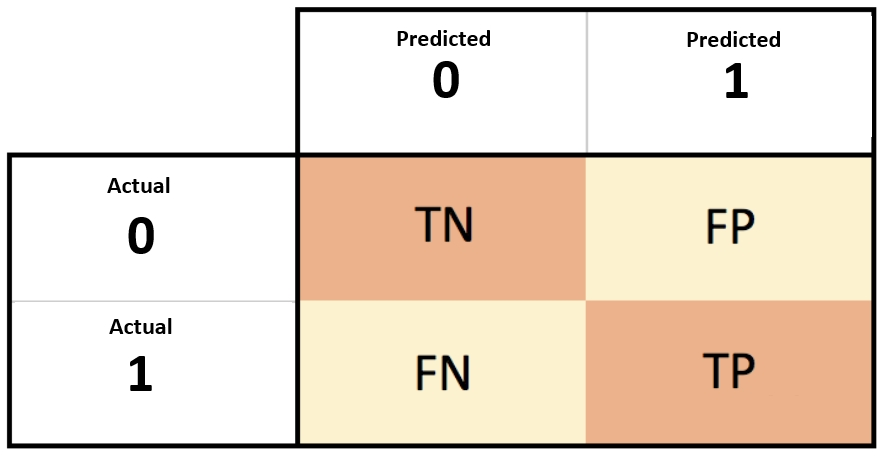

While making predictions our model can have two types of misclassifications or errors:

False Positive (FP) is a Type 1 Error, we predicted positive and it is false.
False Negative (FN) is a Type 2 Error, we predicted negative and it is false.
FP and FN along with True Positives (TP) and True Negatives (TN) are the four parameters captured by the Confusion Matrix.

The likelihood of each type of misclassification is captured in two probabilities known as sensitivity and specificity:

Sensitivity or Recall is the probability of being a True Positive out of the total actual positive instances,this is the sum of TP and FN. Recall is important in medical cases where it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected
Specificity is the probability of being a True Negative out of the total actual negative instances, this is the sum of TN and FP
Additionally, we can find various ways to evaluate the model's performance:

**Accuracy**

It is one of the most common metrics to judge a model. However,it fails while dealing with imbalanced classification problems, although it is not our case. Accuracy can be defined as:

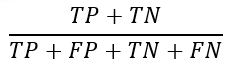

F1 score

In practice, when we try to increase the precision of our model, the recall goes down, and vice-versa. The F1-score captures both the trends in a single value. It is the harmonic average between precision and sensitivity. Since it takes into account both metrics, it is a good way to judge the model performance. We could also use a weighted average when computing F1 score.

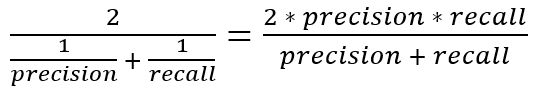

ROC curve and AUC

The ROC is a graph that shows the model performance, it is plotted against TPR and FPR for different thresholds. When we decrease the threshold, the model tends to classify the outputs as positive, which increases both TP and FP.

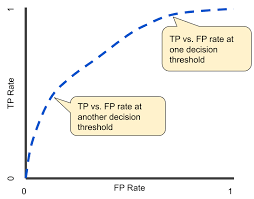

In order to efficiently evaluate this information from the ROC, we use the Area Under the ROC Curve (AUC). It is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives.

**Why do we want to optimize based the ROC-AUC?**

While tuning the hyperparameters for the different models, we did it based on optimizing the ROC-AUC score, but we didn't explain why.
Although our dataset is balanced, we prefer to be guided in optimizing the model based on this measure instead of others such as the accuracy. The reason is that we see the ROC-AUC as a more important measure of how good our model is since it considers the trade-off between precision and recall.

Now we are ready to compare the performance of the different models on the Test data. Let's start with the simple Logistic Regression.

In [ ]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, recall_score,accuracy_score, roc_auc_score,confusion_matrix,roc_curve
# Make the predictions on the validation set
y_pred_test = logreg.predict(X_class_test)

#  Compute the confusion matrix

plot_confusion_matrix(logreg, X_class_test, y_class_test)  
plt.show()

tn, fp, fn, tp = confusion_matrix(y_class_test, y_pred_test).ravel()
#print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

target_names = ['Control', 'RT-CGM']
print(classification_report(y_class_test, y_pred_test, target_names=target_names))
              
#Sensitivity
print('Recall score: {0:0.4f}'. format(recall_score(y_class_test, y_pred_test)))
# Print the accuracy of the model 
print('Accuracy score: {0:0.4f}'. format(accuracy_score(y_class_test, y_pred_test)))

# ROC

fpr, tpr, threshold = metrics.roc_curve(y_class_test, y_pred_test)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Make the predictions on the validation set
y_pred_test = log_reg_l1.predict(X_class_test)

#  Compute the confusion matrix

plot_confusion_matrix(log_reg_l1, X_class_test, y_class_test)  
plt.show()

tn, fp, fn, tp = confusion_matrix(y_class_test, y_pred_test).ravel()
#print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

target_names = ['Control', 'RT-CGM']
print(classification_report(y_class_test, y_pred_test, target_names=target_names))
              
#Sensitivity
print('Recall score: {0:0.4f}'. format(recall_score(y_class_test, y_pred_test)))
# Print the accuracy of the model 
print('Accuracy score: {0:0.4f}'. format(accuracy_score(y_class_test, y_pred_test)))

# ROC

fpr, tpr, threshold = metrics.roc_curve(y_class_test, y_pred_test)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Make the predictions on the validation set
y_pred_test = log_reg_l2.predict(X_class_test)

#  Compute the confusion matrix

plot_confusion_matrix(log_reg_l2, X_class_test, y_class_test)  
plt.show()

tn, fp, fn, tp = confusion_matrix(y_class_test, y_pred_test).ravel()
#print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

target_names = ['Control', 'RT-CGM']
print(classification_report(y_class_test, y_pred_test, target_names=target_names))
              
#Sensitivity
print('Recall score: {0:0.4f}'. format(recall_score(y_class_test, y_pred_test)))
# Print the accuracy of the model 
print('Accuracy score: {0:0.4f}'. format(accuracy_score(y_class_test, y_pred_test)))

# ROC

fpr, tpr, threshold = metrics.roc_curve(y_class_test, y_pred_test)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Make the predictions on the validation set
y_pred_test = log_reg_RFE.predict(X_class_test_new)

#  Compute the confusion matrix

plot_confusion_matrix(log_reg_RFE, X_class_test_new, y_class_test)  
plt.show()

tn, fp, fn, tp = confusion_matrix(y_class_test, y_pred_test).ravel()
#print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

target_names = ['Control', 'RT-CGM']
print(classification_report(y_class_test, y_pred_test, target_names=target_names))
              
#Sensitivity
print('Recall score: {0:0.4f}'. format(recall_score(y_class_test, y_pred_test)))
# Print the accuracy of the model 
print('Accuracy score: {0:0.4f}'. format(accuracy_score(y_class_test, y_pred_test)))

# ROC

fpr, tpr, threshold = metrics.roc_curve(y_class_test, y_pred_test)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()